# Exploratory Data Analysis (EDA)

Este notebook realiza un análisis exploratorio de datos completo siguiendo los siguientes pasos:
1. Implementar librerías necesarias
2. Importar datos de bases de datos abiertas de Internet
3. Limpieza de datos categóricos y numéricos
4. Visualización de datos para determinar pregunta de investigación
5. Normalización Vs Standarización
6. Correlación Pearson, Spearman y Kendall
7. Verificar la fortaleza de las variables a nivel estadístico
8. Técnicas para mejorar variables para la predicción
9. Homoscedasticidad
10. Multicolinealidad
11. Selección de mejores variables para la predicción

## 1. Implementar librerías necesarias

En esta sección, importamos las bibliotecas que utilizaremos en nuestro análisis exploratorio de datos.

In [1]:

# Librerías para manipulación de datos
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import express as px
import plotly.graph_objects as go

# Librerías para estadísticas
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr, kendalltau
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Librerías para preprocesamiento
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# Librerías para selección de características
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

# Configuración de visualización
plt.style.use('ggplot')
sns.set_theme(style="whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

## 2. Importar datos de bases de datos abiertas de Internet

Importaremos datos desde repositorios públicos como UCI Machine Learning Repository o Kaggle.
Para este análisis, vamos a utilizar el dataset de casas en Boston, que es común para problemas de regresión.

In [ ]:
#Opción 2: Cargar desde una URL usando pandas
url = 'https://raw.githubusercontent.com/jaquimbayoc7/DiplomadoML2025/refs/heads/main/Modulo%201%20-%20Introduccion%20a%20ML%20y%20EDA/1.3.%20Data/Housing.csv'
df= pd.read_csv(url)
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Información general del dataset
print("Dimensiones del dataset:", df.shape)
print("\nInformación del dataset:")
df.info()
print("\nEstadísticas descriptivas:")
df.describe().T

Dimensiones del dataset: (545, 13)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

Estadísticas descriptivas:


,count,mean,std,min,25%,50%,75%,max
price,545.0000,4766729.2477,1870439.6157,1750000.0000,3430000.0000,4340000.0000,5740000.0000,13300000.0000
area,545.0000,5150.5413,2170.1410,1650.0000,3600.0000,4600.0000,6360.0000,16200.0000
bedrooms,545.0000,2.9651,0.7381,1.0000,2.0000,3.0000,3.0000,6.0000
bathrooms,545.0000,1.2862,0.5025,1.0000,1.0000,1.0000,2.0000,4.0000
stories,545.0000,1.8055,0.8675,1.0000,1.0000,2.0000,2.0000,4.0000
parking,545.0000,0.6936,0.8616,0.0000,0.0000,0.0000,1.0000,3.0000


## 3. Limpieza de datos categóricos y numéricos

En esta sección realizaremos:
- Detección y manejo de valores nulos
- Detección y manejo de valores atípicos (outliers)
- Transformación de variables categóricas
- Verificación de la consistencia de los datos

In [ ]:
# Verificar valores nulos
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print("Valores nulos por columna:")
print(missing_df)

# Agregar valores nulos artificiales para demostración (si no hay nulos)
if missing_values.sum() == 0:
    print("\nCreando valores nulos artificiales para demostración...")
    # Seleccionar 5% de las filas al azar para algunas columnas
    mask = np.random.rand(len(df)) < 0.05
    cols_to_nullify = df.columns[:2]
    df_demo = df.copy()
    for col in cols_to_nullify:
        df_demo.loc[mask, col] = np.nan

    missing_values_demo = df_demo.isnull().sum()
    missing_percentage_demo = (missing_values_demo / len(df_demo)) * 100
    missing_df_demo = pd.DataFrame({
        'Missing Values': missing_values_demo,
        'Percentage': missing_percentage_demo
    })
    print("\nValores nulos artificiales por columna:")
    print(missing_df_demo[missing_df_demo['Missing Values'] > 0])

    print("\nEjemplos de técnicas para manejar valores nulos:")

Valores nulos por columna:
                  Missing Values  Percentage
price                          0      0.0000
area                           0      0.0000
bedrooms                       0      0.0000
bathrooms                      0      0.0000
stories                        0      0.0000
mainroad                       0      0.0000
guestroom                      0      0.0000
basement                       0      0.0000
hotwaterheating                0      0.0000
airconditioning                0      0.0000
parking                        0      0.0000
prefarea                       0      0.0000
furnishingstatus               0      0.0000

Creando valores nulos artificiales para demostración...

Valores nulos artificiales por columna:
       Missing Values  Percentage
price              30      5.5046
area               30      5.5046

Ejemplos de técnicas para manejar valores nulos:


In [ ]:
# Técnicas para manejar valores nulos

# 1. Eliminar filas con valores nulos
df_dropna = df.dropna()
print(f"1. Eliminación de filas: {len(df) - len(df_dropna)} filas eliminadas")

# 2. Imputación simple con la media para variables numéricas
df_imputed_mean = df.copy()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    if df_imputed_mean[col].isnull().sum() > 0:
        df_imputed_mean[col].fillna(df_imputed_mean[col].mean(), inplace=True)
print("2. Imputación con media completada")

# 3. Imputación con la mediana (más robusta a outliers)
df_imputed_median = df.copy()
for col in numeric_cols:
    if df_imputed_median[col].isnull().sum() > 0:
        df_imputed_median[col].fillna(df_imputed_median[col].median(), inplace=True)
print("3. Imputación con mediana completada")

# 4. Imputación con KNN
# Esto solo funciona con datos numéricos
df_numeric = df[numeric_cols].copy()
if df_numeric.isnull().sum().sum() > 0:
    imputer = KNNImputer(n_neighbors=5)
    df_imputed_knn = pd.DataFrame(
        imputer.fit_transform(df_numeric),
        columns=df_numeric.columns
    )
    print("4. Imputación con KNN completada")
else:
    print("4. No se requiere imputación KNN (no hay valores nulos)")

1. Eliminación de filas: 0 filas eliminadas
2. Imputación con media completada
3. Imputación con mediana completada
4. No se requiere imputación KNN (no hay valores nulos)


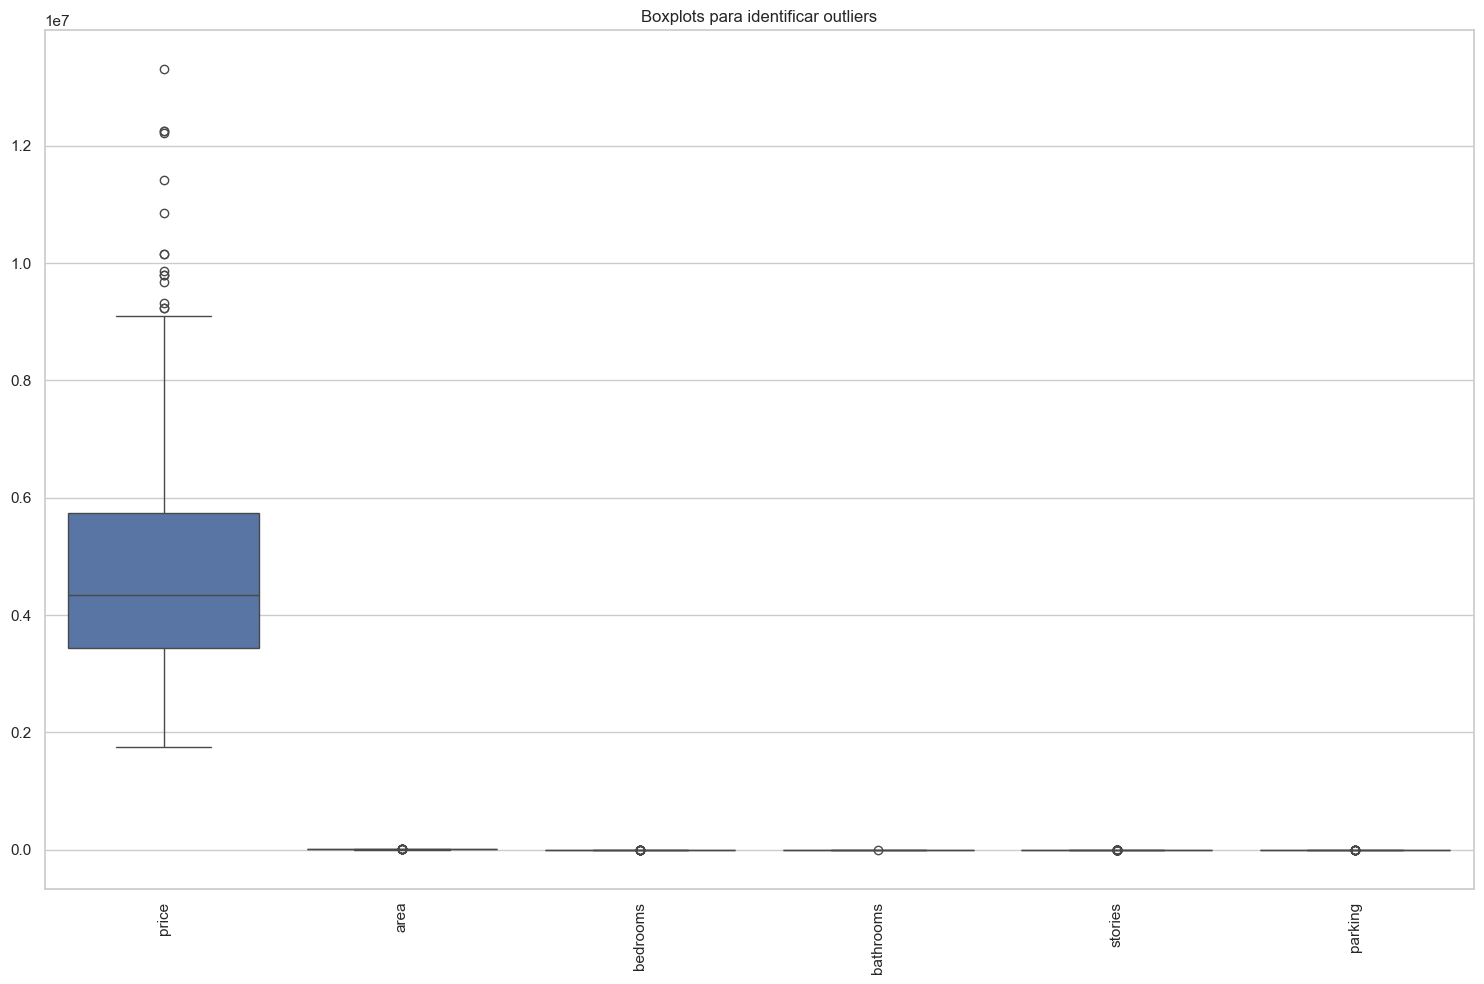


Outliers en 'price':
  Método IQR: 15 outliers (límites: -35000.00, 9205000.00)
  Método Z-score: 6 outliers

Outliers en 'area':
  Método IQR: 12 outliers (límites: -540.00, 10500.00)
  Método Z-score: 7 outliers

Outliers en 'bedrooms':
  Método IQR: 12 outliers (límites: 0.50, 4.50)
  Método Z-score: 2 outliers


In [ ]:
# Detección y manejo de outliers

# Función para detectar outliers usando el método IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Función para detectar outliers usando Z-score
def detect_outliers_zscore(df, col, threshold=3):
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[z_scores > threshold]
    return outliers

# Visualizar outliers en boxplots
plt.figure(figsize=(15, 10))
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.boxplot(data=df[numeric_columns])
plt.title('Boxplots para identificar outliers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Detectar outliers para un par de columnas como ejemplo
for col in numeric_columns[:3]:  # Solo mostrar para las primeras 3 columnas
    outliers_iqr, lower, upper = detect_outliers_iqr(df, col)
    outliers_zscore = detect_outliers_zscore(df, col)

    print(f"\nOutliers en '{col}':")
    print(f"  Método IQR: {len(outliers_iqr)} outliers (límites: {lower:.2f}, {upper:.2f})")
    print(f"  Método Z-score: {len(outliers_zscore)} outliers")

In [ ]:
# Transformación de variables categóricas
# Para este dataset, podríamos no tener variables categóricas. Vamos a crear algunas artificiales para demostración

# Crear una copia del dataframe
df_with_cat = df.copy()

# Crear variables categóricas artificiales
# 1. Discretizar una variable numérica
df_with_cat['CHAS_ORIG'] = df_with_cat.get('CHAS', 0)  # Guardar original si existe
if 'CHAS' in df_with_cat.columns:
    # Si CHAS ya existe, vamos a usarla como está
    print("La columna CHAS ya existe y la usaremos como categórica.")
else:
    # Si no existe, crear una categoría basada en otra variable
    median_value = df_with_cat[numeric_columns[0]].median()
    df_with_cat['CHAS'] = (df_with_cat[numeric_columns[0]] > median_value).astype(int)
    print(f"Se creó la columna categórica CHAS basada en {numeric_columns[0]}.")

# 2. Crear otra variable categórica con múltiples niveles
if 'RAD' in df_with_cat.columns:
    # Si RAD existe, discretizarla en categorías
    bins = [0, 3, 6, 24]
    labels = ['Bajo', 'Medio', 'Alto']
    df_with_cat['RAD_CAT'] = pd.cut(df_with_cat['RAD'], bins=bins, labels=labels)
    print("Se convirtió RAD en una variable categórica.")
else:
    # Crear una categoría basada en cuartiles de otra variable
    bins = [df_with_cat[numeric_columns[1]].min() - 0.1,
            df_with_cat[numeric_columns[1]].quantile(0.33),
            df_with_cat[numeric_columns[1]].quantile(0.66),
            df_with_cat[numeric_columns[1]].max() + 0.1]
    labels = ['Bajo', 'Medio', 'Alto']
    df_with_cat['PRICE_CAT'] = pd.cut(df_with_cat[numeric_columns[1]], bins=bins, labels=labels)
    print(f"Se creó la variable categórica PRICE_CAT basada en {numeric_columns[1]}.")

# Mostrar las primeras filas para verificar
print("\nPrimeras filas con variables categóricas:")
df_with_cat.head()

Se creó la columna categórica CHAS basada en price.
Se creó la variable categórica PRICE_CAT basada en area.

Primeras filas con variables categóricas:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,CHAS_ORIG,CHAS,PRICE_CAT
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,0,1,Alto
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,0,1,Alto
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,0,1,Alto
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,0,1,Alto
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,0,1,Alto


In [ ]:
# Transformar variables categóricas: One-Hot Encoding y Label Encoding

# Identificar variables categóricas
categorical_cols = df_with_cat.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols.append('CHAS')  # Agregar CHAS aunque sea numérica porque es binaria
categorical_cols = list(set(categorical_cols))  # Eliminar duplicados si hay

print(f"Variables categóricas: {categorical_cols}")

# 1. Label Encoding (para variables ordinales)
df_label_encoded = df_with_cat.copy()
le = LabelEncoder()

for col in categorical_cols:
    if col in df_label_encoded.columns:
        if df_label_encoded[col].dtype == 'object' or df_label_encoded[col].dtype.name == 'category':
            df_label_encoded[col] = le.fit_transform(df_label_encoded[col].astype(str))

print("\nPrimeras filas después de Label Encoding:")
print(df_label_encoded[categorical_cols + [numeric_columns[0]]].head())

# 2. One-Hot Encoding (para variables nominales)
df_onehot = df_with_cat.copy()
for col in categorical_cols:
    if col in df_onehot.columns:
        if df_onehot[col].dtype == 'object' or df_onehot[col].dtype.name == 'category':
            dummies = pd.get_dummies(df_onehot[col], prefix=col, drop_first=True)
            df_onehot = pd.concat([df_onehot, dummies], axis=1)
            df_onehot.drop(col, axis=1, inplace=True)

print("\nPrimeras filas después de One-Hot Encoding:")
print(df_onehot.head())

Variables categóricas: ['mainroad', 'guestroom', 'PRICE_CAT', 'basement', 'furnishingstatus', 'CHAS', 'airconditioning', 'prefarea', 'hotwaterheating']

Primeras filas después de Label Encoding:
   mainroad  guestroom  PRICE_CAT  basement  furnishingstatus  CHAS  \
0         1          0          0         0                 0     1   
1         1          0          0         0                 0     1   
2         1          0          0         1                 1     1   
3         1          0          0         1                 0     1   
4         1          1          0         1                 0     1   

   airconditioning  prefarea  hotwaterheating     price  
0                1         1                0  13300000  
1                1         0                0  12250000  
2                0         1                0  12250000  
3                1         1                0  12215000  
4                1         0                0  11410000  

Primeras filas después de One

## 4. Visualización de datos para determinar pregunta de investigación

En esta sección, realizaremos visualizaciones para entender mejor los datos y formular preguntas de investigación relevantes.

In [ ]:
df_onehot.head()

,price,area,bedrooms,bathrooms,stories,parking,CHAS_ORIG,CHAS,mainroad_yes,guestroom_yes,PRICE_CAT_Medio,PRICE_CAT_Alto,basement_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,airconditioning_yes,prefarea_yes,hotwaterheating_yes
0,13300000,7420,4,2,3,2,0,1,True,False,False,True,False,False,False,True,True,False
1,12250000,8960,4,4,4,3,0,1,True,False,False,True,False,False,False,True,False,False
2,12250000,9960,3,2,2,2,0,1,True,False,False,True,True,True,False,False,True,False
3,12215000,7500,4,2,2,3,0,1,True,False,False,True,True,False,False,True,True,False
4,11410000,7420,4,1,2,2,0,1,True,True,False,True,True,False,False,True,False,False


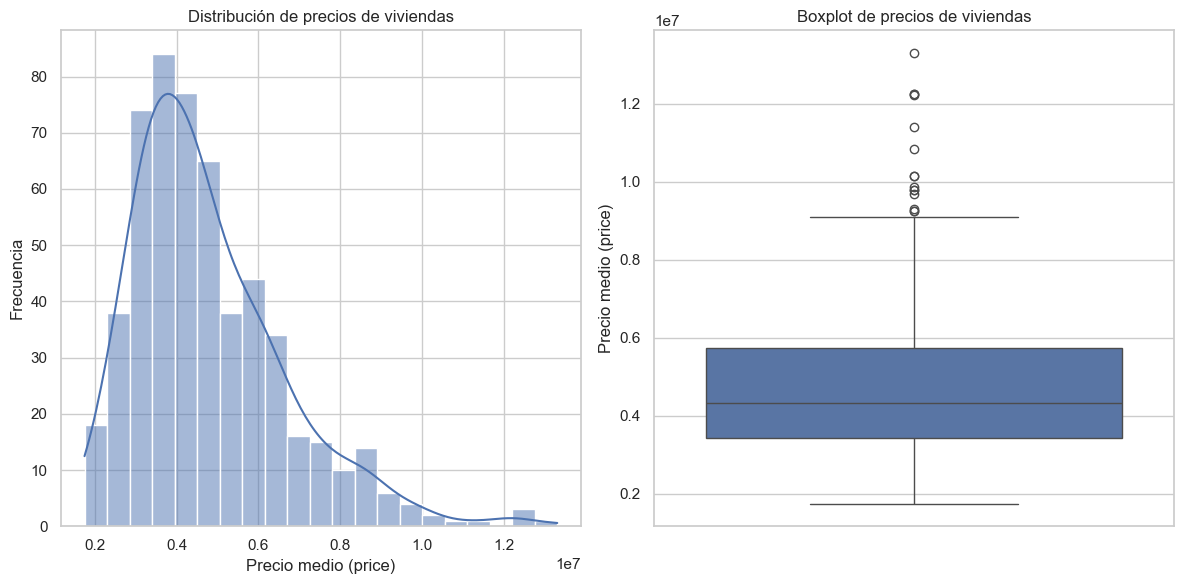

Asimetría de price: 1.212
Curtosis de price: 1.960
La distribución muestra asimetría significativa.


In [ ]:
# 1. Visualizar la distribución de la variable objetivo
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Distribución de precios de viviendas')
plt.xlabel('Precio medio (price)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'])
plt.title('Boxplot de precios de viviendas')
plt.ylabel('Precio medio (price)')

plt.tight_layout()
plt.show()

# Examinar la asimetría y la curtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurtosis()
print(f"Asimetría de price: {skewness:.3f}")
print(f"Curtosis de price: {kurtosis:.3f}")
if abs(skewness) > 0.5:
    print("La distribución muestra asimetría significativa.")
else:
    print("La distribución es aproximadamente simétrica.")

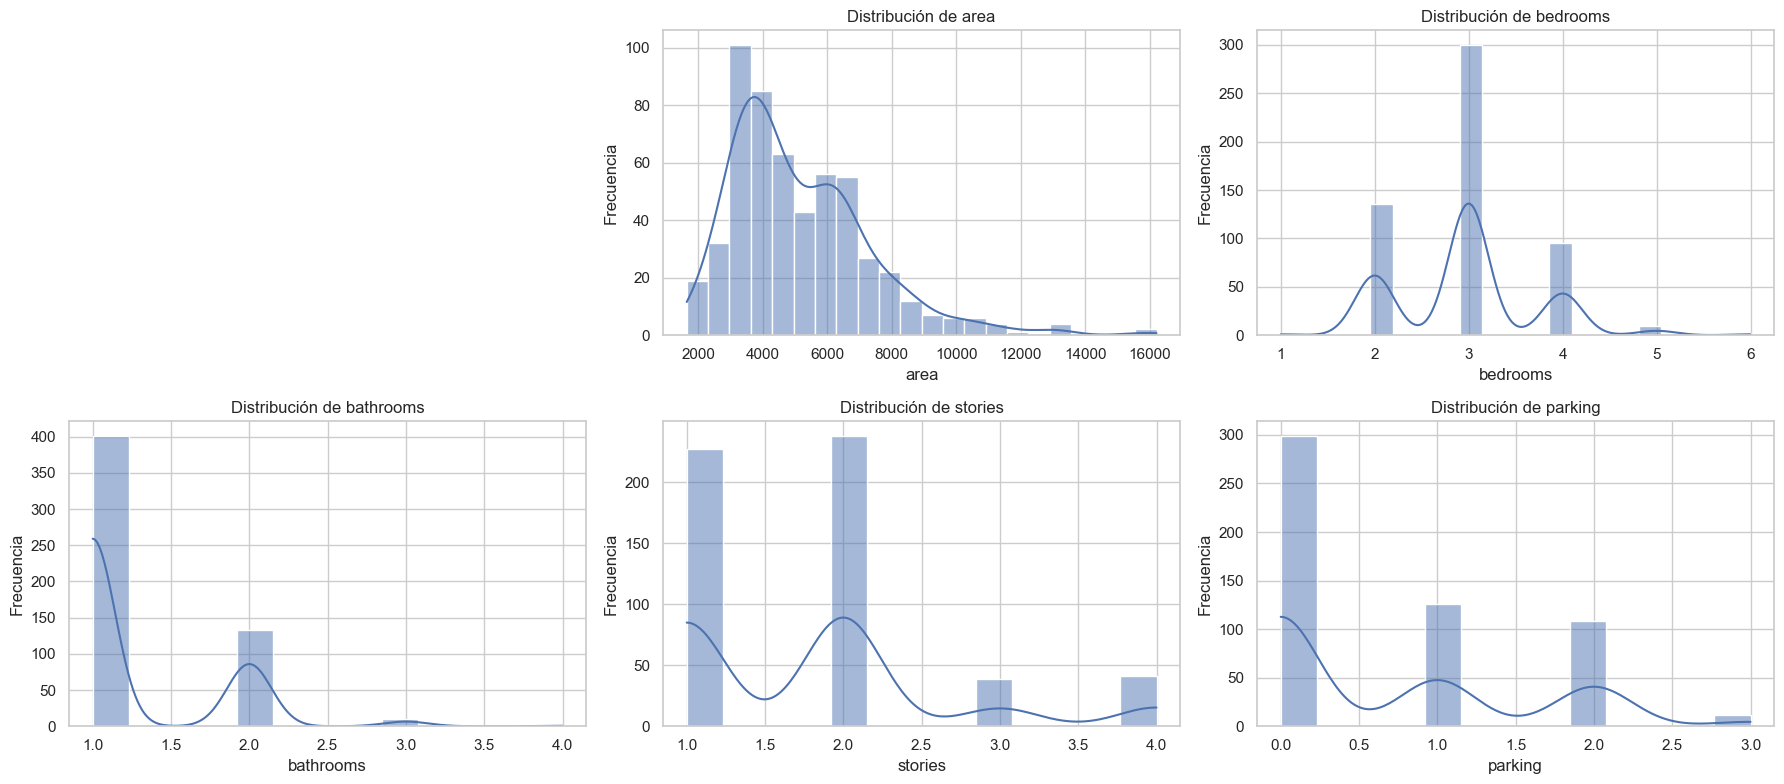

In [ ]:
# 2. Distribución de variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3  # 3 columnas por fila

plt.figure(figsize=(18, num_rows * 4))

for i, col in enumerate(numeric_cols):
    if col != 'price':  # Excluir la variable objetivo que ya visualizamos
        plt.subplot(num_rows, 3, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

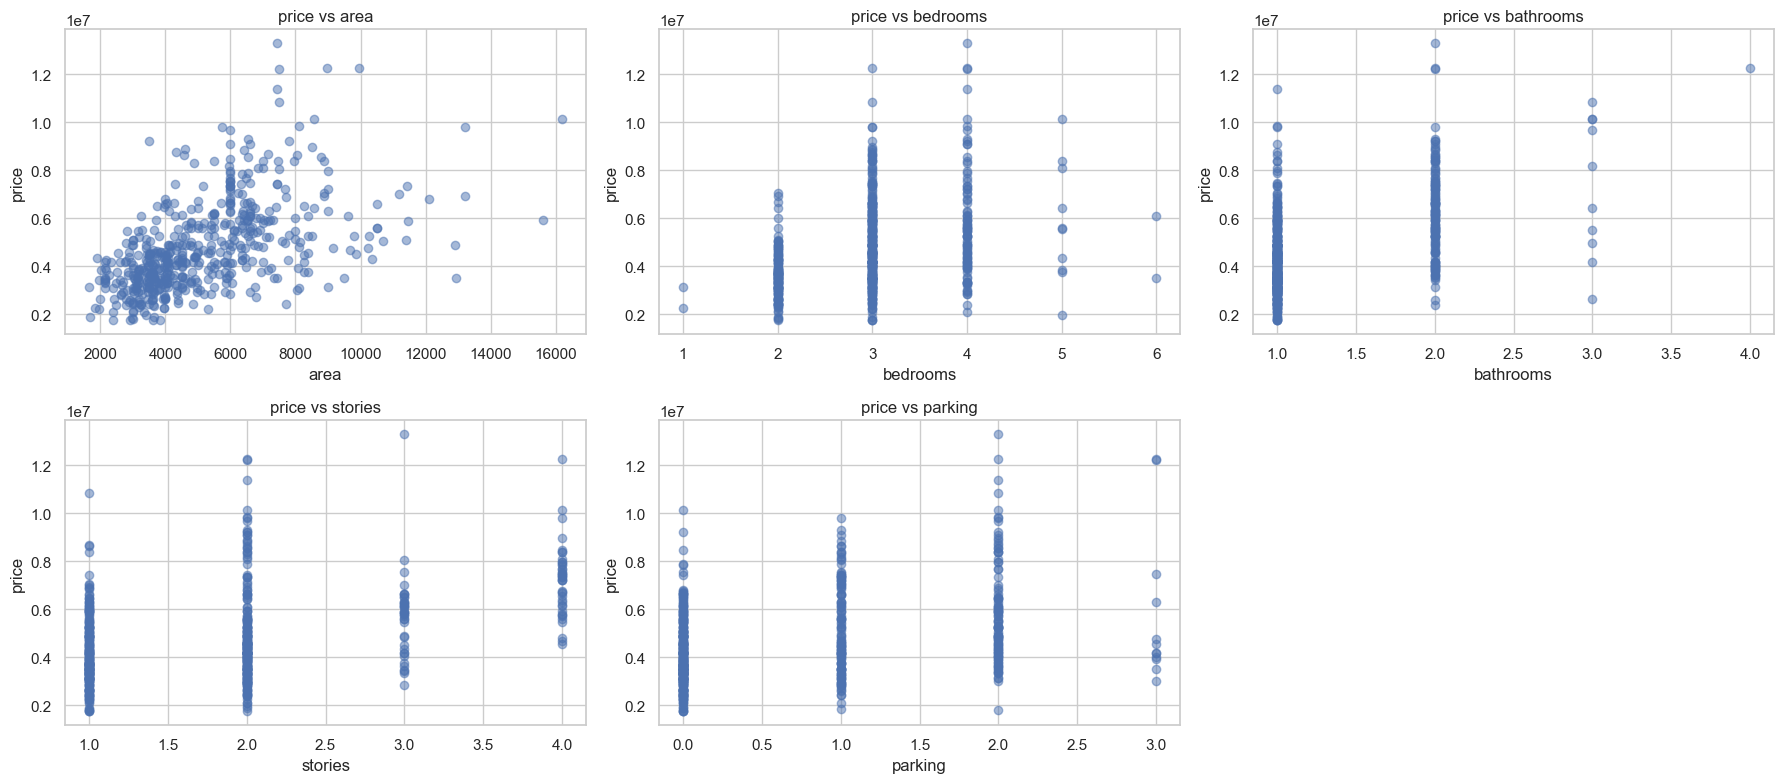

In [ ]:
# 3. Visualizar relaciones entre variables numéricas y la variable objetivo
num_rows = (len(numeric_cols) - 1 + 1) // 3  # Excluyendo price
plt.figure(figsize=(18, num_rows * 4))

i = 1
for col in numeric_cols:
    if col != 'price':  # Excluir la variable objetivo
        plt.subplot(num_rows, 3, i)
        plt.scatter(df[col], df['price'], alpha=0.5)
        plt.title(f'price vs {col}')
        plt.xlabel(col)
        plt.ylabel('price')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Convertir variables binarias (yes/no) a numéricas (1/0)
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

# Convertir furnishingstatus a valores numéricos
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

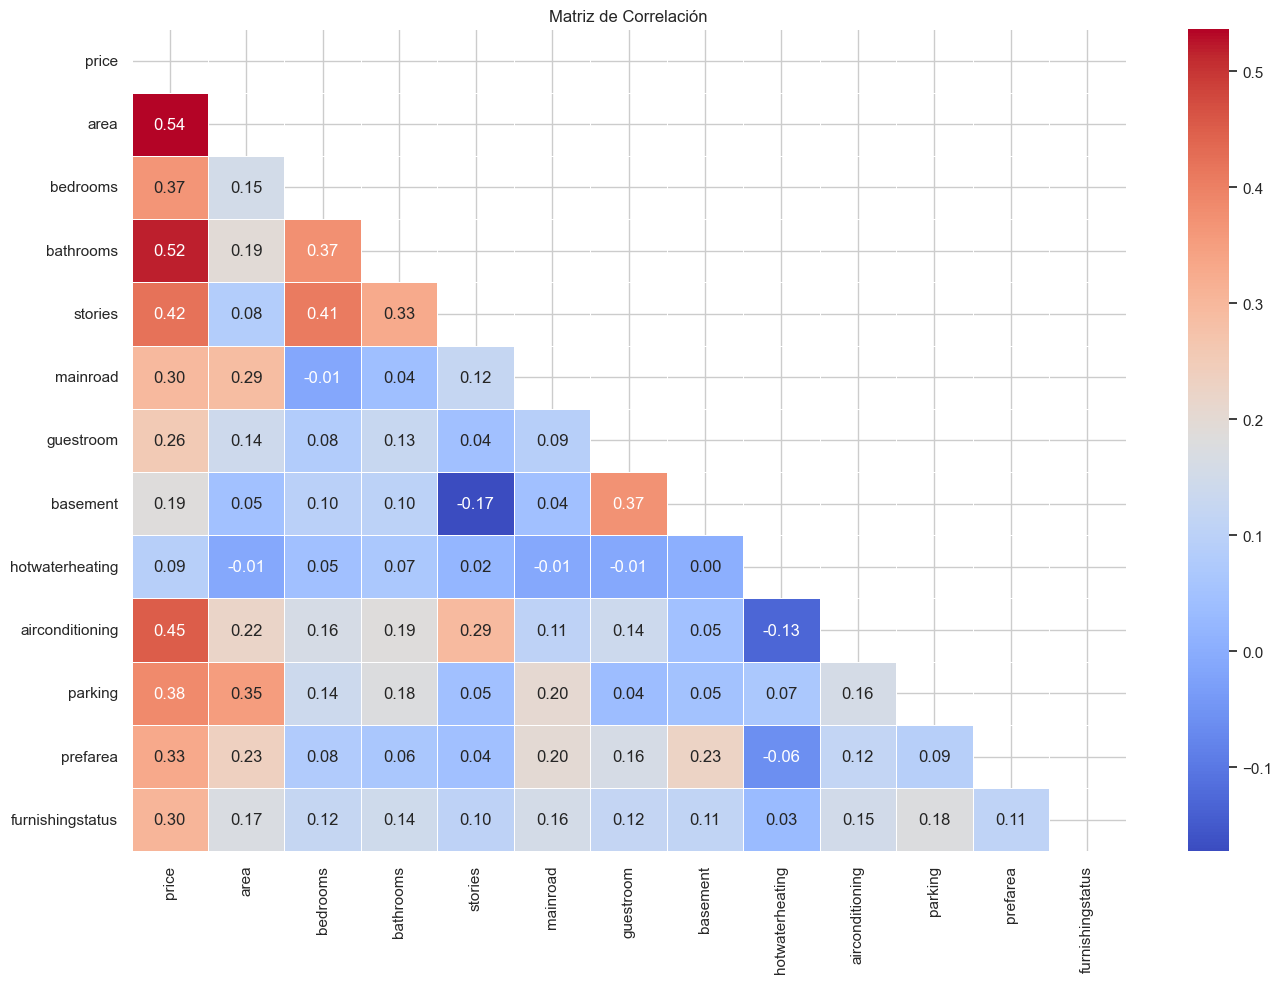


Correlaciones con la variable objetivo (price):
area               0.5360
bathrooms          0.5175
airconditioning    0.4530
stories            0.4207
parking            0.3844
bedrooms           0.3665
prefarea           0.3298
furnishingstatus   0.3047
mainroad           0.2969
guestroom          0.2555
basement           0.1871
hotwaterheating    0.0931
Name: price, dtype: float64


In [ ]:
# 4. Matriz de correlación con heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            mask=mask, linewidths=0.5)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

# Identificar las características más correlacionadas con la variable objetivo
target_correlations = correlation_matrix['price'].drop('price').sort_values(ascending=False)
print("\nCorrelaciones con la variable objetivo (price):")
print(target_correlations)

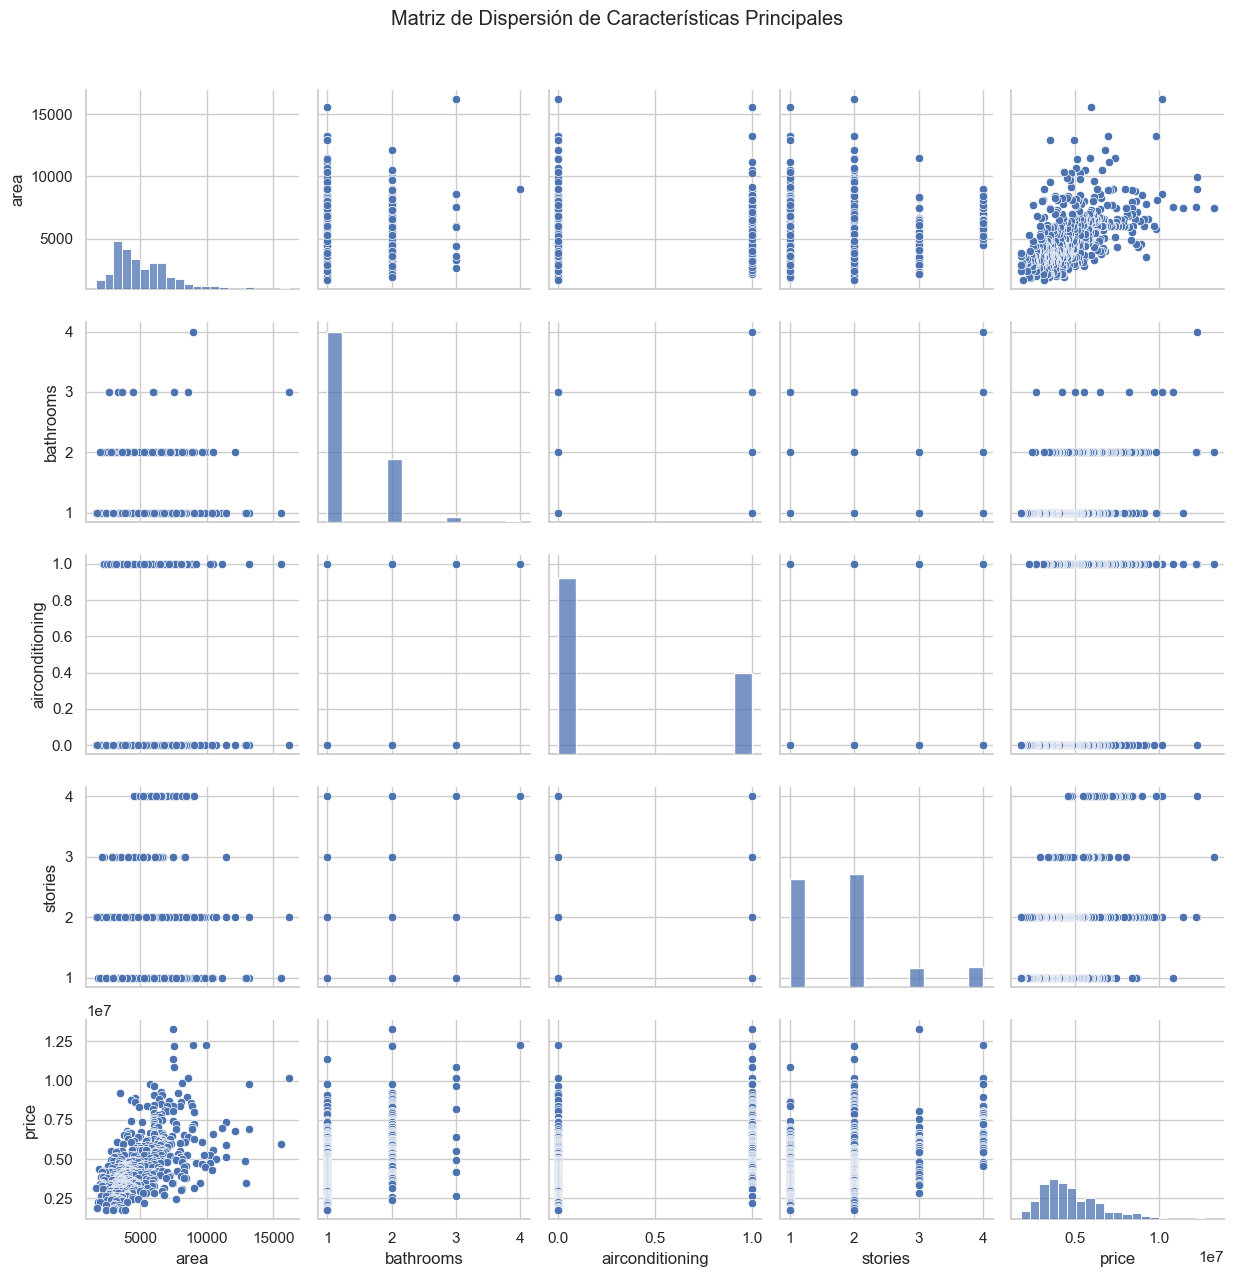

In [ ]:
# 5. Pairplot para visualizar relaciones entre múltiples variables
# Seleccionar un subconjunto de variables para no sobrecargar el gráfico
top_features = target_correlations.abs().nlargest(4).index.tolist()
plot_cols = top_features + ['price']

sns.pairplot(df[plot_cols], height=2.5)
plt.suptitle('Matriz de Dispersión de Características Principales', y=1.02)
plt.tight_layout()
plt.show()

### Formulación de la pregunta de investigación

Basándonos en las visualizaciones y el análisis exploratorio realizado, podemos formular las siguientes preguntas de investigación:

1. **Pregunta principal**: ¿Cuáles son los factores más influyentes en el precio de las viviendas y cómo podemos predecirlos con precisión?

2. **Preguntas secundarias**:
   - ¿Qué características sociodemográficas tienen mayor impacto en los precios?
   - ¿Cómo influye la ubicación (proximidad al río, accesibilidad) en el valor de las propiedades?
   - ¿Existe una relación no lineal entre algunas características y el precio?
   - ¿Qué variables son redundantes y cuáles son las más importantes para la predicción?

Para abordar estas preguntas, continuaremos con un análisis más profundo de las relaciones entre variables y la preparación de los datos para la modelización.

## 5. Normalización Vs Standarización

Comparamos diferentes técnicas de escalado de características para preparar los datos para el modelado.

In [ ]:
# Seleccionar características numéricas para escalar
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'price' in numeric_cols:
    numeric_cols.remove('price')  # Excluir la variable objetivo

# Crear un dataframe para visualizar los resultados
df_scaling = df[numeric_cols + ['price']].copy()

# 1. Estandarización (Standardization) - Z-score
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(
    scaler_standard.fit_transform(df_scaling[numeric_cols]),
    columns=[f"{col}_std" for col in numeric_cols]
)

# 2. Normalización (Min-Max Scaling)
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(
    scaler_minmax.fit_transform(df_scaling[numeric_cols]),
    columns=[f"{col}_norm" for col in numeric_cols]
)

# 3. Escalado robusto (menos sensible a outliers)
scaler_robust = RobustScaler()
df_robust = pd.DataFrame(
    scaler_robust.fit_transform(df_scaling[numeric_cols]),
    columns=[f"{col}_robust" for col in numeric_cols]
)

# Combinar los resultados
result_df = pd.concat([df_scaling, df_standardized, df_normalized, df_robust], axis=1)

# Mostrar las primeras filas
print("Comparación de métodos de escalado (primeras filas):")
result_df.head()

Comparación de métodos de escalado (primeras filas):


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price,area_std,bedrooms_std,bathrooms_std,stories_std,mainroad_std,guestroom_std,basement_std,hotwaterheating_std,airconditioning_std,parking_std,prefarea_std,furnishingstatus_std,area_norm,bedrooms_norm,bathrooms_norm,stories_norm,mainroad_norm,guestroom_norm,basement_norm,hotwaterheating_norm,airconditioning_norm,parking_norm,prefarea_norm,furnishingstatus_norm,area_robust,bedrooms_robust,bathrooms_robust,stories_robust,mainroad_robust,guestroom_robust,basement_robust,hotwaterheating_robust,airconditioning_robust,parking_robust,prefarea_robust,furnishingstatus_robust
0,7420,4,2,3,1,0,0,0,1,2,1,2,13300000,1.0467,1.4034,1.4218,1.3782,0.4056,-0.4653,-0.7345,-0.2193,1.4726,1.5177,1.8049,1.4063,0.3966,0.6000,0.3333,0.6667,1.0000,0.0000,0.0000,0.0000,1.0000,0.6667,1.0000,1.0000,1.0217,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.0000,1.0000,0.5000
1,8960,4,4,4,1,0,0,0,1,3,0,2,12250000,1.7570,1.4034,5.4058,2.5320,0.4056,-0.4653,-0.7345,-0.2193,1.4726,2.6794,-0.5540,1.4063,0.5024,0.6000,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.5797,1.0000,3.0000,2.0000,0.0000,0.0000,0.0000,0.0000,1.0000,3.0000,0.0000,0.5000
2,9960,3,2,2,1,0,1,0,0,2,1,1,12250000,2.2182,0.0473,1.4218,0.2244,0.4056,-0.4653,1.3614,-0.2193,-0.6791,1.5177,1.8049,0.0917,0.5711,0.4000,0.3333,0.3333,1.0000,0.0000,1.0000,0.0000,0.0000,0.6667,1.0000,0.5000,1.9420,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,2.0000,1.0000,0.0000
3,7500,4,2,2,1,0,1,0,1,3,1,2,12215000,1.0836,1.4034,1.4218,0.2244,0.4056,-0.4653,1.3614,-0.2193,1.4726,2.6794,1.8049,1.4063,0.4021,0.6000,0.3333,0.3333,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0507,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,3.0000,1.0000,0.5000
4,7420,4,1,2,1,1,1,0,1,2,0,2,11410000,1.0467,1.4034,-0.5702,0.2244,0.4056,2.1491,1.3614,-0.2193,1.4726,1.5177,-0.5540,1.4063,0.3966,0.6000,0.0000,0.3333,1.0000,1.0000,1.0000,0.0000,1.0000,0.6667,0.0000,1.0000,1.0217,1.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,2.0000,0.0000,0.5000


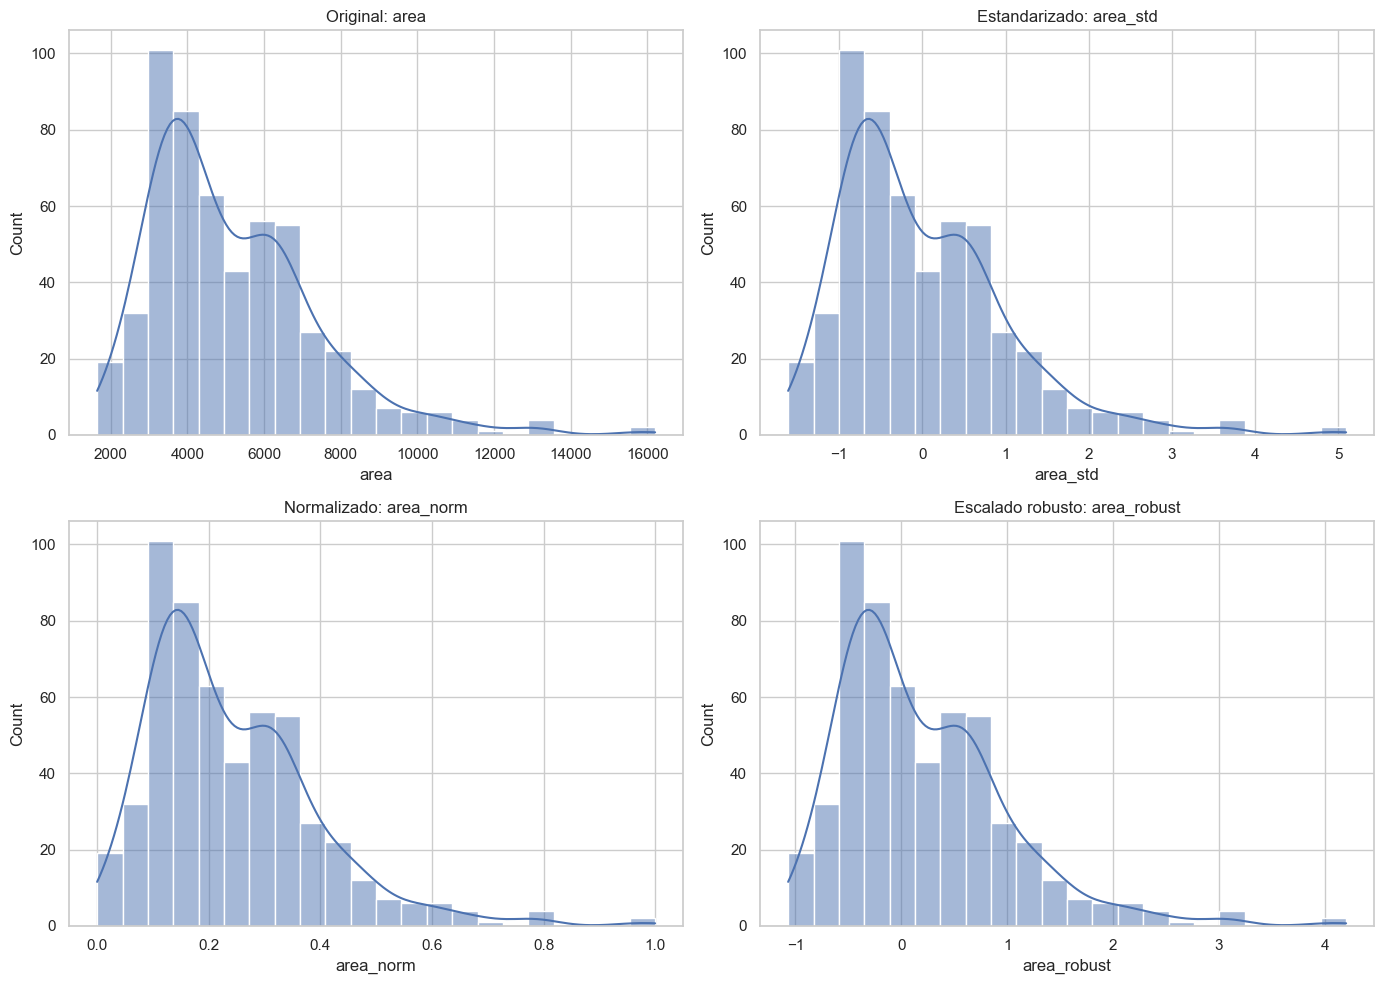

In [ ]:
# Visualizar la distribución antes y después del escalado
# Seleccionar una columna como ejemplo
example_col = numeric_cols[0]

plt.figure(figsize=(14, 10))

# Original
plt.subplot(2, 2, 1)
sns.histplot(df_scaling[example_col], kde=True)
plt.title(f'Original: {example_col}')

# Estandarizado
plt.subplot(2, 2, 2)
sns.histplot(df_standardized[f"{example_col}_std"], kde=True)
plt.title(f'Estandarizado: {example_col}_std')

# Normalizado
plt.subplot(2, 2, 3)
sns.histplot(df_normalized[f"{example_col}_norm"], kde=True)
plt.title(f'Normalizado: {example_col}_norm')

# Escalado robusto
plt.subplot(2, 2, 4)
sns.histplot(df_robust[f"{example_col}_robust"], kde=True)
plt.title(f'Escalado robusto: {example_col}_robust')

plt.tight_layout()
plt.show()

In [ ]:
# Comparar estadísticas descriptivas de los diferentes métodos de escalado
stats_original = df_scaling[example_col].describe()
stats_std = df_standardized[f"{example_col}_std"].describe()
stats_norm = df_normalized[f"{example_col}_norm"].describe()
stats_robust = df_robust[f"{example_col}_robust"].describe()

# Crear un DataFrame para comparar
stats_comparison = pd.DataFrame({
    'Original': stats_original,
    'Estandarizado': stats_std,
    'Normalizado': stats_norm,
    'Escalado robusto': stats_robust
})

print(f"Comparación de estadísticas para {example_col}:")
stats_comparison

Comparación de estadísticas para area:


,Original,Estandarizado,Normalizado,Escalado robusto
count,545.0000,545.0000,545.0000,545.0000
mean,5150.5413,-0.0000,0.2406,0.1995
std,2170.1410,1.0009,0.1492,0.7863
min,1650.0000,-1.6145,0.0000,-1.0688
25%,3600.0000,-0.7151,0.1340,-0.3623
50%,4600.0000,-0.2539,0.2027,0.0000
75%,6360.0000,0.5578,0.3237,0.6377
max,16200.0000,5.0963,1.0000,4.2029


### Comparación de métodos de escalado

1. **Estandarización (Z-score)**:
   - Transforma los datos para tener media = 0 y desviación estándar = 1
   - Útil cuando los datos siguen aproximadamente una distribución normal
   - Recomendado para algoritmos sensibles a la escala de los datos (regresión, SVM, clustering, etc.)

2. **Normalización (Min-Max)**:
   - Transforma los datos al rango [0, 1]
   - Preserva la forma de la distribución
   - Útil cuando se requiere un rango específico de valores
   - Recomendado para redes neuronales y cuando la distribución no es gaussiana

3. **Escalado Robusto**:
   - Escala los datos según cuartiles (mediana y rango intercuartílico)
   - Menos sensible a outliers
   - Útil cuando hay valores atípicos significativos en los datos

**¿Cuál elegir?**
- Para este dataset, dado que hemos observado algunos outliers, el escalado robusto podría ser una buena opción
- Si vamos a aplicar algoritmos como Regresión Lineal o SVM, la estandarización sería apropiada
- Si vamos a utilizar redes neuronales, la normalización Min-Max podría ser preferible

## 6. Correlación Pearson, Spearman y Kendall

Analizamos las relaciones entre variables utilizando diferentes coeficientes de correlación.

<Figure size 1200x800 with 0 Axes>

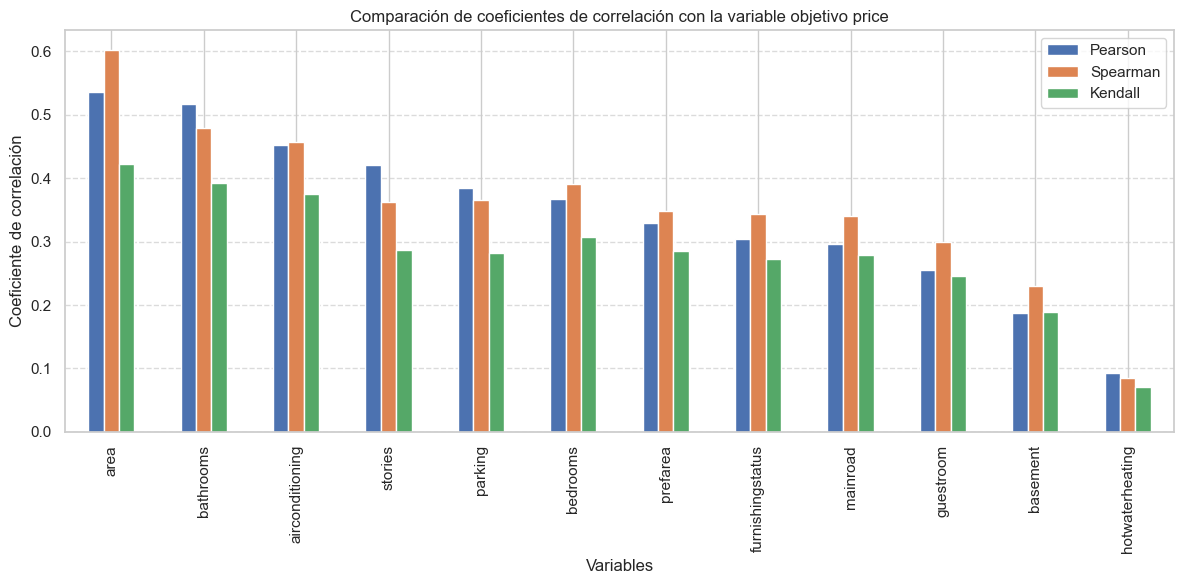

Correlaciones con la variable objetivo (price):


,Pearson,Spearman,Kendall
area,0.5360,0.6029,0.4222
bathrooms,0.5175,0.4799,0.3930
airconditioning,0.4530,0.4571,0.3749
stories,0.4207,0.3629,0.2861
parking,0.3844,0.3654,0.2828
bedrooms,0.3665,0.3905,0.3068
prefarea,0.3298,0.3477,0.2852
furnishingstatus,0.3047,0.3439,0.2729
mainroad,0.2969,0.3401,0.2790
guestroom,0.2555,0.3000,0.2460


In [ ]:
# 1. Correlación de Pearson (paramétrica, lineal)
pearson_corr = df[numeric_cols + ['price']].corr(method='pearson')

# 2. Correlación de Spearman (no paramétrica, ordinal)
spearman_corr = df[numeric_cols + ['price']].corr(method='spearman')

# 3. Correlación de Kendall (no paramétrica, ordinal, más robusta con muestras pequeñas)
kendall_corr = df[numeric_cols + ['price']].corr(method='kendall')

# Visualizar las correlaciones con la variable objetivo
target_correlations = pd.DataFrame({
    'Pearson': pearson_corr['price'].drop('price'),
    'Spearman': spearman_corr['price'].drop('price'),
    'Kendall': kendall_corr['price'].drop('price')
})

# Ordenar por correlación de Pearson
target_correlations = target_correlations.sort_values('Pearson', ascending=False)

# Visualizar
plt.figure(figsize=(12, 8))
target_correlations.plot(kind='bar', figsize=(12, 6))
plt.title('Comparación de coeficientes de correlación con la variable objetivo price')
plt.ylabel('Coeficiente de correlación')
plt.xlabel('Variables')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Correlaciones con la variable objetivo (price):")
target_correlations

<Figure size 1200x600 with 0 Axes>

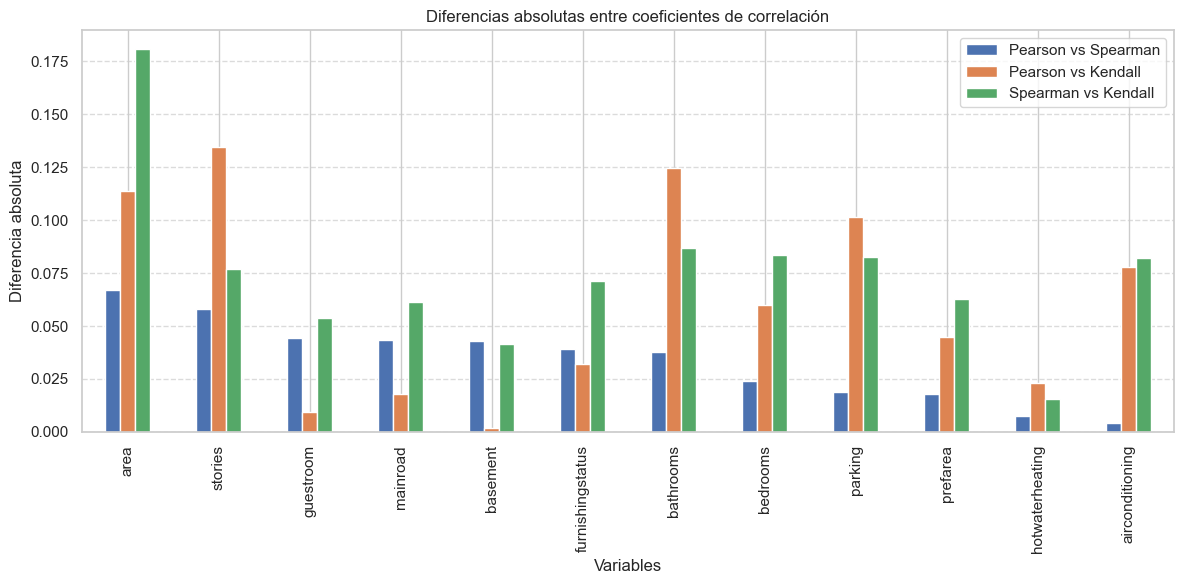

Diferencias entre métodos de correlación:


,Pearson vs Spearman,Pearson vs Kendall,Spearman vs Kendall
area,0.0669,0.1138,0.1806
stories,0.0579,0.1346,0.0767
guestroom,0.0445,0.0095,0.0540
mainroad,0.0432,0.0179,0.0612
basement,0.0430,0.0016,0.0414
furnishingstatus,0.0392,0.0319,0.0711
bathrooms,0.0376,0.1245,0.0869
bedrooms,0.0240,0.0597,0.0837
parking,0.0190,0.1016,0.0826
prefarea,0.0179,0.0446,0.0625


In [ ]:
# Calcular y visualizar las diferencias entre los métodos de correlación
diff_pearson_spearman = np.abs(target_correlations['Pearson'] - target_correlations['Spearman'])
diff_pearson_kendall = np.abs(target_correlations['Pearson'] - target_correlations['Kendall'])
diff_spearman_kendall = np.abs(target_correlations['Spearman'] - target_correlations['Kendall'])

differences = pd.DataFrame({
    'Pearson vs Spearman': diff_pearson_spearman,
    'Pearson vs Kendall': diff_pearson_kendall,
    'Spearman vs Kendall': diff_spearman_kendall
})

# Ordenar por la mayor diferencia entre Pearson y Spearman
differences = differences.sort_values('Pearson vs Spearman', ascending=False)

plt.figure(figsize=(12, 6))
differences.plot(kind='bar', figsize=(12, 6))
plt.title('Diferencias absolutas entre coeficientes de correlación')
plt.ylabel('Diferencia absoluta')
plt.xlabel('Variables')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Diferencias entre métodos de correlación:")
differences

C:\Users\DELL\AppData\Local\Temp\ipykernel_27488\3849629014.py:22: RankWarning: Polyfit may be poorly conditioned
  z2 = np.polyfit(df[var], df['price'], 2)


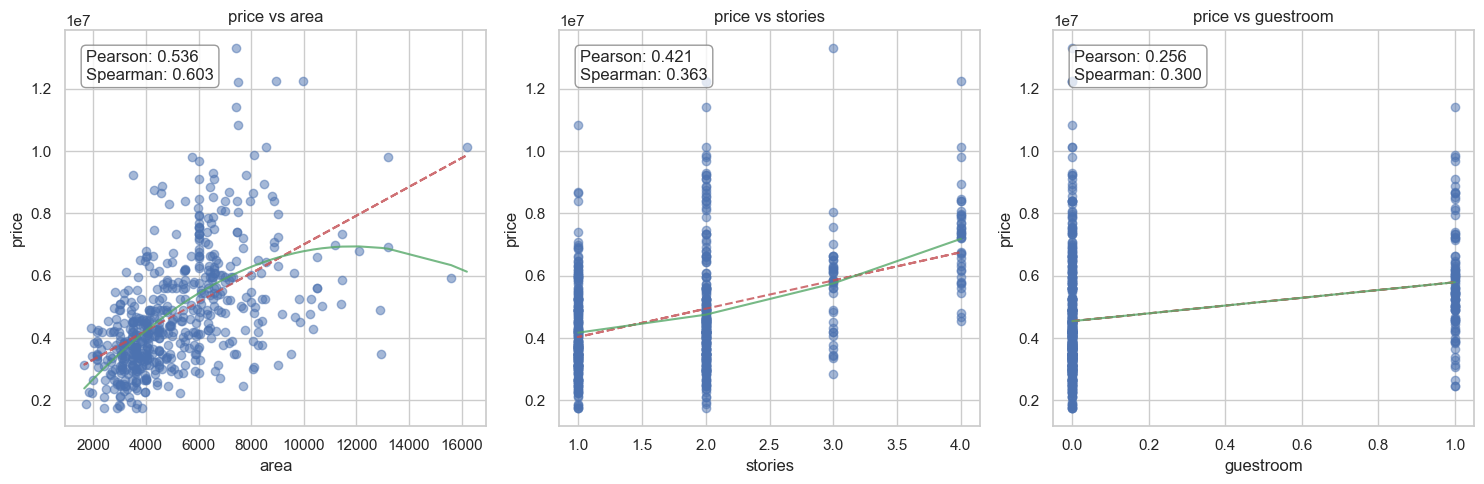

In [ ]:
# Visualizar relaciones no lineales que podrían explicar diferencias entre Pearson y Spearman
# Seleccionar variables con mayor diferencia entre Pearson y Spearman
if not differences.empty and len(differences) > 0:
    top_diff_vars = differences.sort_values('Pearson vs Spearman', ascending=False).head(3).index.tolist()

    # Visualizar relaciones con la variable objetivo
    fig, axes = plt.subplots(1, len(top_diff_vars), figsize=(15, 5))

    if len(top_diff_vars) == 1:
        axes = [axes]  # Convertir a lista si solo hay un subplot

    for i, var in enumerate(top_diff_vars):
        # Scatter plot
        axes[i].scatter(df[var], df['price'], alpha=0.5)

        # Ajustar línea de regresión lineal
        z = np.polyfit(df[var], df['price'], 1)
        p = np.poly1d(z)
        axes[i].plot(df[var], p(df[var]), "r--", alpha=0.8)

        # Ajustar curva no lineal (LOESS/LOWESS simplificado con polyfit)
        z2 = np.polyfit(df[var], df['price'], 2)
        p2 = np.poly1d(z2)
        x_sorted = np.sort(df[var])
        axes[i].plot(x_sorted, p2(x_sorted), "g-", alpha=0.8)

        axes[i].set_title(f'price vs {var}')
        axes[i].set_xlabel(var)
        axes[i].set_ylabel('price')

        # Agregar información de correlación
        pearson = target_correlations.loc[var, 'Pearson']
        spearman = target_correlations.loc[var, 'Spearman']
        axes[i].annotate(f"Pearson: {pearson:.3f}\nSpearman: {spearman:.3f}",
                         xy=(0.05, 0.95), xycoords='axes fraction',
                         ha='left', va='top',
                         bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes variables para visualizar diferencias.")

### Interpretación de los coeficientes de correlación

1. **Correlación de Pearson**:
   - Mide relaciones lineales entre variables continuas
   - Sensible a outliers y supone normalidad
   - Valor entre -1 (correlación negativa perfecta) y 1 (correlación positiva perfecta)

2. **Correlación de Spearman**:
   - Mide relaciones monótonas (no necesariamente lineales)
   - Basada en rangos, menos sensible a outliers
   - Útil cuando los datos no siguen una distribución normal

3. **Correlación de Kendall**:
   - También basada en rangos, pero mide la concordancia entre pares de observaciones
   - Más robusta para muestras pequeñas y con outliers
   - Suele dar valores más bajos que Spearman

**Observaciones**:
- Las diferencias entre Pearson y Spearman/Kendall sugieren relaciones no lineales
- Variables donde Spearman > Pearson: posible relación monótona pero no lineal
- Variables donde Pearson > Spearman: posible influencia de outliers o relación lineal con distribución no normal

Para el modelado, debemos considerar transformaciones no lineales o modelos más flexibles para capturar estas relaciones.

## 7. Verificar la fortaleza de las variables a nivel estadístico

Utilizamos pruebas estadísticas para evaluar la significancia y el poder predictivo de las variables.

In [ ]:
# 1. Análisis univariado - correlación y significancia estadística
print("Correlación y p-valor para cada variable con la variable objetivo:")
univariate_results = []

for col in numeric_cols:
    # Correlación de Pearson
    pearson_corr, pearson_pval = pearsonr(df[col], df['price'])

    # Correlación de Spearman
    spearman_corr, spearman_pval = spearmanr(df[col], df['price'])

    # Añadir resultados
    univariate_results.append({
        'Variable': col,
        'Pearson Correlation': pearson_corr,
        'Pearson p-value': pearson_pval,
        'Pearson Significant': pearson_pval < 0.05,
        'Spearman Correlation': spearman_corr,
        'Spearman p-value': spearman_pval,
        'Spearman Significant': spearman_pval < 0.05
    })

# Convertir a DataFrame
univariate_df = pd.DataFrame(univariate_results)
univariate_df = univariate_df.sort_values('Pearson Correlation', key=abs, ascending=False)

# Mostrar resultados
pd.set_option('display.float_format', '{:.4f}'.format)
univariate_df

Correlación y p-valor para cada variable con la variable objetivo:


,Variable,Pearson Correlation,Pearson p-value,Pearson Significant,Spearman Correlation,Spearman p-value,Spearman Significant
0,area,0.5360,0.0000,True,0.6029,0.0000,True
2,bathrooms,0.5175,0.0000,True,0.4799,0.0000,True
8,airconditioning,0.4530,0.0000,True,0.4571,0.0000,True
3,stories,0.4207,0.0000,True,0.3629,0.0000,True
9,parking,0.3844,0.0000,True,0.3654,0.0000,True
1,bedrooms,0.3665,0.0000,True,0.3905,0.0000,True
10,prefarea,0.3298,0.0000,True,0.3477,0.0000,True
11,furnishingstatus,0.3047,0.0000,True,0.3439,0.0000,True
4,mainroad,0.2969,0.0000,True,0.3401,0.0000,True
5,guestroom,0.2555,0.0000,True,0.3000,0.0000,True


In [ ]:
# 2. Regresión lineal simple para cada variable
print("\nResultados de regresión lineal simple para cada variable:")
regression_results = []

for col in numeric_cols:
    # Crear modelo de regresión simple
    X = sm.add_constant(df[col])  # Añadir intercept
    model = sm.OLS(df['price'], X).fit()

    # Extraer estadísticas clave
    regression_results.append({
        'Variable': col,
        'Coefficient': model.params[col],
        'Std Error': model.bse[col],
        't-statistic': model.tvalues[col],
        'p-value': model.pvalues[col],
        'R-squared': model.rsquared,
        'Adj. R-squared': model.rsquared_adj,
        'F-statistic': model.fvalue,
        'AIC': model.aic,
        'BIC': model.bic
    })

# Convertir a DataFrame
regression_df = pd.DataFrame(regression_results)
regression_df = regression_df.sort_values('R-squared', ascending=False)

# Mostrar resultados relevantes
regression_df[['Variable', 'Coefficient', 'p-value', 'R-squared', 'Adj. R-squared', 'F-statistic']]


Resultados de regresión lineal simple para cada variable:


,Variable,Coefficient,p-value,R-squared,Adj. R-squared,F-statistic
0,area,461.9749,0.0000,0.2873,0.2860,218.8841
2,bathrooms,1926558.8901,0.0000,0.2679,0.2665,198.6545
8,airconditioning,1821280.9031,0.0000,0.2052,0.2037,140.1627
3,stories,907116.9032,0.0000,0.1770,0.1755,116.7804
9,parking,834490.4823,0.0000,0.1478,0.1462,94.1433
1,bedrooms,928788.1189,0.0000,0.1343,0.1327,84.2510
10,prefarea,1453746.9261,0.0000,0.1088,0.1071,66.2586
11,furnishingstatus,748599.3595,0.0000,0.0929,0.0912,55.5814
4,mainroad,1592872.7836,0.0000,0.0881,0.0865,52.4918
5,guestroom,1248351.2822,0.0000,0.0653,0.0636,37.9283


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     94.24
Date:                Fri, 28 Mar 2025   Prob (F-statistic):          3.81e-123
Time:                        15:16:47   Log-Likelihood:                -8333.0
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     532   BIC:                         1.675e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.245e+05   2.37e+05  

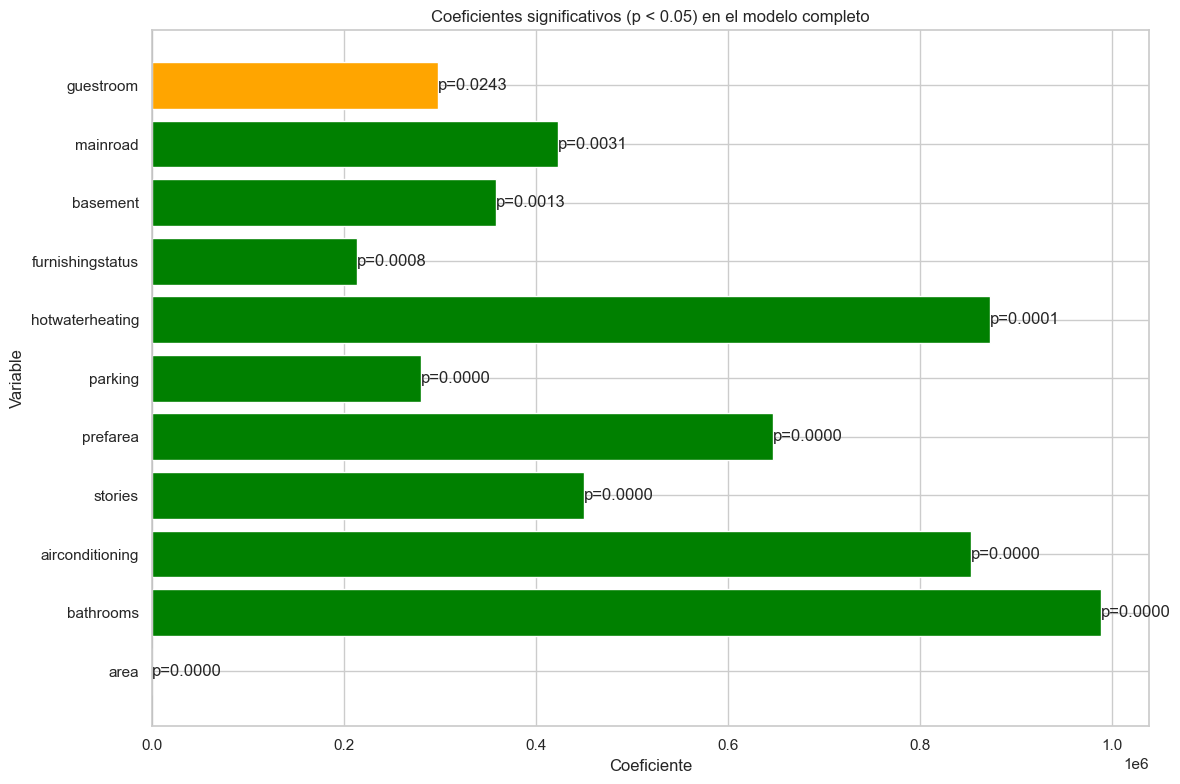

In [ ]:
# 3. Regresión lineal múltiple con todas las variables
X = sm.add_constant(df[numeric_cols])
model_full = sm.OLS(df['price'], X).fit()

# Mostrar resumen del modelo
print(model_full.summary())

# Extraer coeficientes y p-valores
coef_summary = pd.DataFrame({
    'Variable': model_full.params.index[1:],  # Excluir la constante
    'Coefficient': model_full.params.values[1:],
    'Std Error': model_full.bse.values[1:],
    't-statistic': model_full.tvalues.values[1:],
    'p-value': model_full.pvalues.values[1:]
})

# Ordenar por p-valor
coef_summary = coef_summary.sort_values('p-value')

# Visualizar los coeficientes significativos
plt.figure(figsize=(12, 8))
significant = coef_summary[coef_summary['p-value'] < 0.05]
colors = ['green' if p < 0.01 else 'orange' for p in significant['p-value']]

bars = plt.barh(significant['Variable'], significant['Coefficient'], color=colors)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Coeficientes significativos (p < 0.05) en el modelo completo')

# Añadir anotaciones de p-valor
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + (0.01 if bar.get_width() > 0 else -0.01),
             bar.get_y() + bar.get_height()/2,
             f"p={significant['p-value'].iloc[i]:.4f}",
             va='center', ha='left' if bar.get_width() > 0 else 'right')

plt.tight_layout()
plt.show()

### Interpretación de la fortaleza estadística de las variables

1. **Variables más significativas en el análisis univariado**:
   - Identificamos las variables con mayor correlación y significancia estadística
   - Las variables con p-valor < 0.05 tienen una relación estadísticamente significativa con la variable objetivo

2. **Variables en el modelo multivariado**:
   - Al considerar todas las variables juntas, algunas pueden perder significancia debido a la multicolinealidad
   - Las variables con p-valor < 0.05 en el modelo multivariado son predictores significativos independientes

3. **Diferencias entre análisis univariado y multivariado**:
   - Variables significativas en ambos son las más robustas
   - Variables significativas solo en uno pueden estar relacionadas con otras variables

4. **Efecto de variables categóricas**:
   - ANOVA nos muestra si hay diferencias significativas entre grupos (solo mostrado si hay variables categóricas)

Estos resultados nos ayudan a determinar qué variables son más importantes para la predicción y cuáles podríamos considerar eliminar o transformar.

## 8. Técnicas para mejorar variables para la predicción

Exploramos transformaciones y técnicas para mejorar el poder predictivo de nuestras variables.

Asimetría de las variables numéricas:
hotwaterheating     4.3534
guestroom           1.6884
bathrooms           1.5893
area                1.3212
prefarea            1.2544
stories             1.0821
parking             0.8421
airconditioning     0.7957
basement            0.6286
bedrooms            0.4957
furnishingstatus    0.1177
mainroad           -2.0654
dtype: float64

Variables con alta asimetría (|skew| > 0.5): ['hotwaterheating', 'guestroom', 'bathrooms', 'area', 'prefarea', 'stories', 'parking', 'airconditioning', 'basement', 'mainroad']


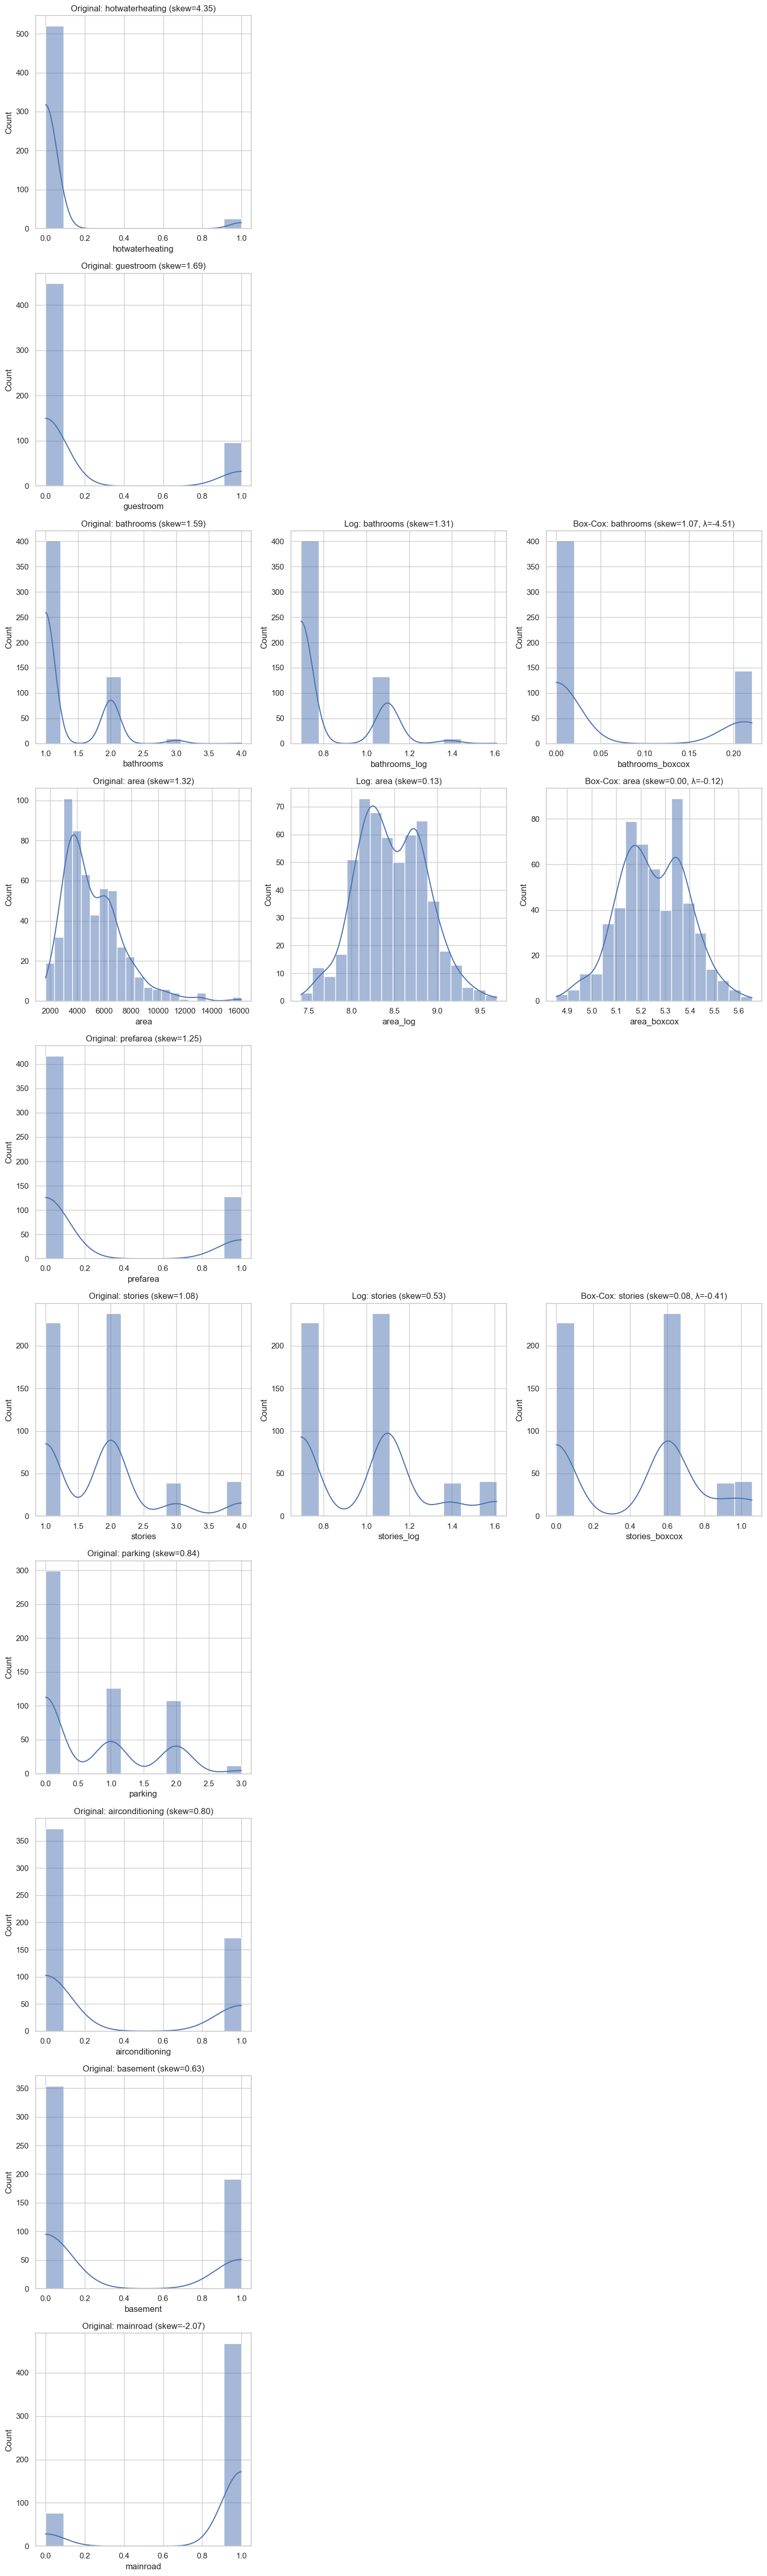

In [ ]:
# 1. Transformaciones para normalizar distribuciones
# Identificar variables con asimetría significativa
skewness = df[numeric_cols].skew().sort_values(ascending=False)
print("Asimetría de las variables numéricas:")
print(skewness)

# Variables con alta asimetría (|skew| > 0.5)
high_skew_cols = skewness[abs(skewness) > 0.5].index.tolist()
print(f"\nVariables con alta asimetría (|skew| > 0.5): {high_skew_cols}")

# Transformaciones para las variables con alta asimetría
df_transformed = df.copy()

if len(high_skew_cols) > 0:
    plt.figure(figsize=(15, 5 * len(high_skew_cols)))
    i = 1

    for col in high_skew_cols:
        # Original
        plt.subplot(len(high_skew_cols), 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Original: {col} (skew={skewness[col]:.2f})')
        i += 1

        # Transformación logarítmica
        if (df[col] > 0).all():
            df_transformed[f'{col}_log'] = np.log1p(df[col])
            plt.subplot(len(high_skew_cols), 3, i)
            sns.histplot(df_transformed[f'{col}_log'], kde=True)
            log_skew = df_transformed[f'{col}_log'].skew()
            plt.title(f'Log: {col} (skew={log_skew:.2f})')
            i += 1
        else:
            i += 1

        # Transformación Box-Cox (solo para valores positivos)
        if (df[col] > 0).all():
            df_transformed[f'{col}_boxcox'], lambda_val = stats.boxcox(df[col])
            plt.subplot(len(high_skew_cols), 3, i)
            sns.histplot(df_transformed[f'{col}_boxcox'], kde=True)
            boxcox_skew = df_transformed[f'{col}_boxcox'].skew()
            plt.title(f'Box-Cox: {col} (skew={boxcox_skew:.2f}, λ={lambda_val:.2f})')
            i += 1
        else:
            i += 1

    plt.tight_layout()
    plt.show()
else:
    print("No hay variables con asimetría significativa que requieran transformación.")

In [ ]:
# 2. Interacciones entre variables
# Seleccionar las top variables más correlacionadas con la variable objetivo
top_corr_vars = univariate_df.nlargest(3, 'Pearson Correlation')['Variable'].tolist()

if len(top_corr_vars) >= 2:
    print(f"Creando interacciones entre las variables top: {top_corr_vars}")

    # Crear interacciones (multiplicaciones) entre las variables top
    for i in range(len(top_corr_vars)):
        for j in range(i+1, len(top_corr_vars)):
            var1 = top_corr_vars[i]
            var2 = top_corr_vars[j]
            interaction_name = f"{var1}_x_{var2}"
            df_transformed[interaction_name] = df[var1] * df[var2]

            # Calcular correlación con la variable objetivo
            corr = df_transformed[interaction_name].corr(df['price'])
            print(f"Correlación de {interaction_name} con price: {corr:.4f}")

            # Comparar con las correlaciones originales
            corr1 = df[var1].corr(df['price'])
            corr2 = df[var2].corr(df['price'])
            print(f"  Comparación: {var1}={corr1:.4f}, {var2}={corr2:.4f}")

            if abs(corr) > max(abs(corr1), abs(corr2)):
                print(f"  ¡La interacción mejora la correlación!")
else:
    print("No hay suficientes variables para crear interacciones.")

Creando interacciones entre las variables top: ['area', 'bathrooms', 'airconditioning']
Correlación de area_x_bathrooms con price: 0.6748
  Comparación: area=0.5360, bathrooms=0.5175
  ¡La interacción mejora la correlación!
Correlación de area_x_airconditioning con price: 0.5334
  Comparación: area=0.5360, airconditioning=0.4530
Correlación de bathrooms_x_airconditioning con price: 0.5554
  Comparación: bathrooms=0.5175, airconditioning=0.4530
  ¡La interacción mejora la correlación!



Creando términos polinómicos para area:
Correlación original: 0.5360
Correlación area^2: 0.4638


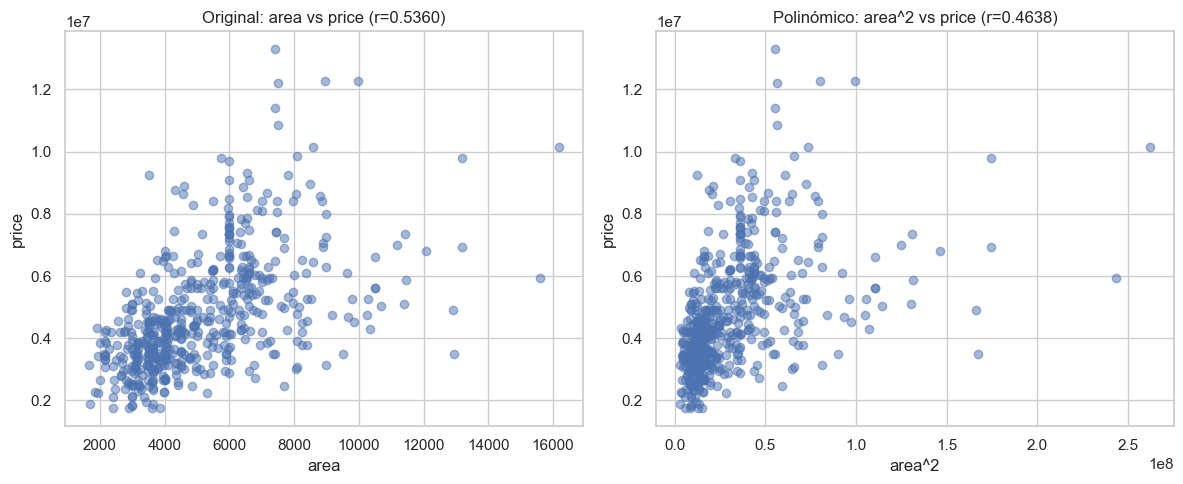

Correlación area^3: 0.3711


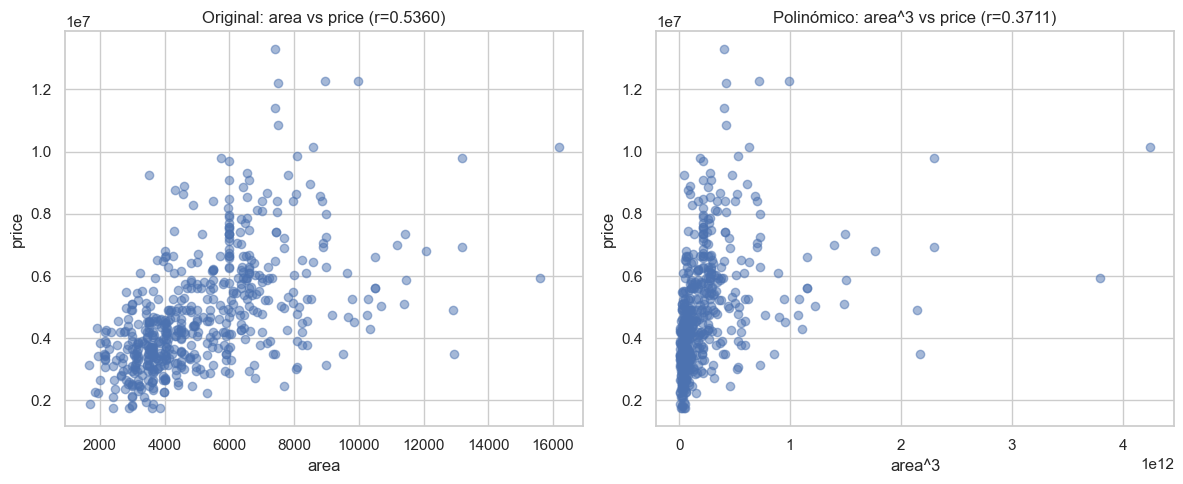


Creando términos polinómicos para bathrooms:
Correlación original: 0.5175
Correlación bathrooms^2: 0.5072


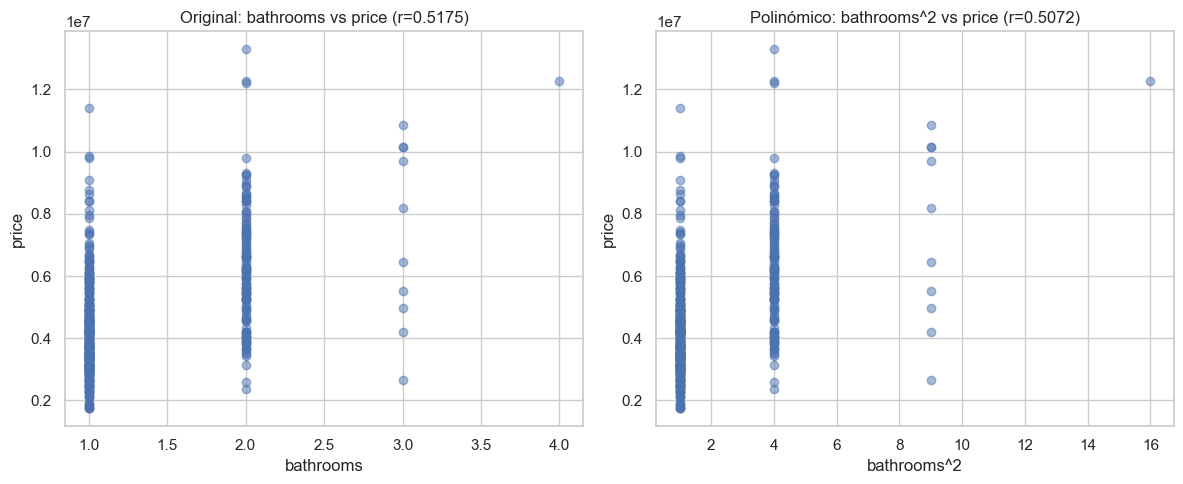

Correlación bathrooms^3: 0.4722


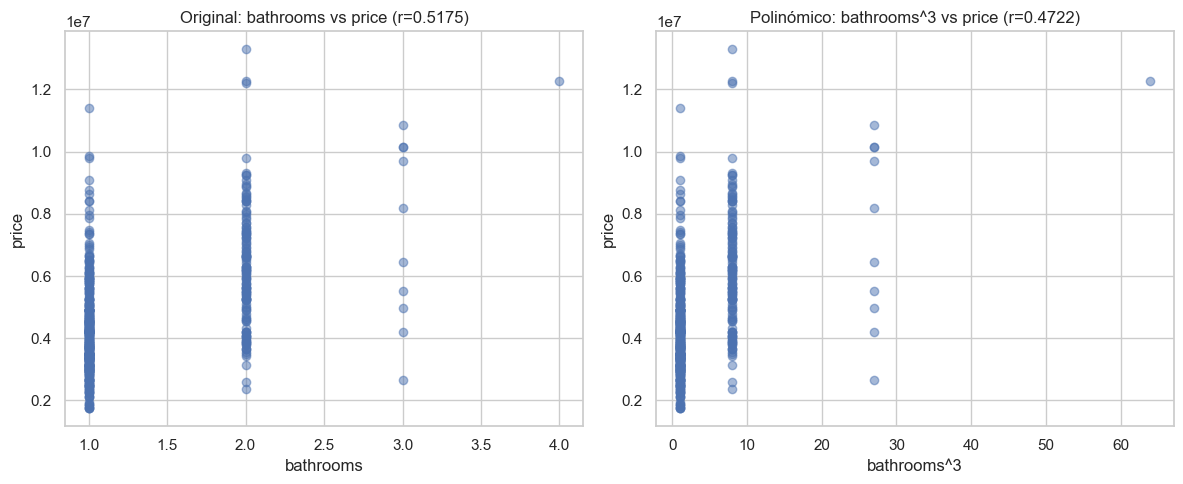

In [ ]:
# 3. Variables polinómicas
# Elegir un par de variables para ilustrar
poly_vars = top_corr_vars[:2] if len(top_corr_vars) >= 2 else numeric_cols[:2]
poly_degrees = [2, 3]  # Grados polinómicos a probar

for var in poly_vars:
    print(f"\nCreando términos polinómicos para {var}:")

    # Original
    corr_original = df[var].corr(df['price'])
    print(f"Correlación original: {corr_original:.4f}")

    # Términos polinómicos
    for degree in poly_degrees:
        poly_name = f"{var}_pow{degree}"
        df_transformed[poly_name] = df[var] ** degree
        corr_poly = df_transformed[poly_name].corr(df['price'])
        print(f"Correlación {var}^{degree}: {corr_poly:.4f}")

        # Visualizar la relación
        plt.figure(figsize=(12, 5))

        # Scatter original
        plt.subplot(1, 2, 1)
        plt.scatter(df[var], df['price'], alpha=0.5)
        plt.title(f'Original: {var} vs price (r={corr_original:.4f})')
        plt.xlabel(var)
        plt.ylabel('price')

        # Scatter polinómico
        plt.subplot(1, 2, 2)
        plt.scatter(df_transformed[poly_name], df['price'], alpha=0.5)
        plt.title(f'Polinómico: {var}^{degree} vs price (r={corr_poly:.4f})')
        plt.xlabel(f'{var}^{degree}')
        plt.ylabel('price')

        plt.tight_layout()
        plt.show()

In [ ]:
# 4. Evaluar transformaciones con modelos de regresión simple

# Seleccionar un subconjunto de las variables transformadas
transformed_vars = []

# Añadir variables log transformadas
log_vars = [col for col in df_transformed.columns if col.endswith('_log')]
transformed_vars.extend(log_vars[:2])  # Limitar a 2 por tipo

# Añadir variables box-cox transformadas
boxcox_vars = [col for col in df_transformed.columns if col.endswith('_boxcox')]
transformed_vars.extend(boxcox_vars[:2])  # Limitar a 2 por tipo

# Añadir interacciones
interaction_vars = [col for col in df_transformed.columns if '_x_' in col]
transformed_vars.extend(interaction_vars[:2])  # Limitar a 2 por tipo

# Añadir polinómicos
poly_vars = [col for col in df_transformed.columns if col.startswith(tuple(numeric_cols)) and 'pow' in col]
transformed_vars.extend(poly_vars[:2])  # Limitar a 2 por tipo

# Limitar a variables que existen
transformed_vars = [var for var in transformed_vars if var in df_transformed.columns]

if transformed_vars:
    print(f"Evaluando {len(transformed_vars)} variables transformadas:")

    # Evaluar con regresión simple
    model_results = []

    for var in transformed_vars:
        # Base variable (sin transformación)
        base_var = var.split('_')[0] if any(x in var for x in ['_log', '_boxcox', '_pow']) else \
                  var.split('_x_')[0] if '_x_' in var else var

        # Ajustar modelo con variable original
        if base_var in df.columns:
            X_base = sm.add_constant(df[base_var])
            model_base = sm.OLS(df['price'], X_base).fit()
            r2_base = model_base.rsquared
        else:
            r2_base = float('nan')

        # Ajustar modelo con variable transformada
        X_trans = sm.add_constant(df_transformed[var])
        model_trans = sm.OLS(df['price'], X_trans).fit()
        r2_trans = model_trans.rsquared

        # Calcular mejora
        if not np.isnan(r2_base):
            improvement = (r2_trans - r2_base) / r2_base * 100
        else:
            improvement = float('nan')

        # Guardar resultados
        model_results.append({
            'Variable': var,
            'Base Variable': base_var if base_var in df.columns else 'N/A',
            'R² Original': r2_base if not np.isnan(r2_base) else None,
            'R² Transformada': r2_trans,
            'Mejora %': improvement if not np.isnan(improvement) else None
        })

    # Convertir a DataFrame y ordenar por mejora
    model_results_df = pd.DataFrame(model_results)
    model_results_df = model_results_df.sort_values('Mejora %', ascending=False)

    # Mostrar resultados
    pd.set_option('display.float_format', '{:.4f}'.format)
    model_results_df
else:
    print("No hay variables transformadas para evaluar.")

Evaluando 8 variables transformadas:


In [ ]:
model_results_df

,Variable,Base Variable,R² Original,R² Transformada,Mejora %
4,area_x_bathrooms,area,0.2873,0.4553,58.4816
1,area_log,area,0.2873,0.3150,9.6379
3,area_boxcox,area,0.2873,0.3143,9.3952
0,bathrooms_log,bathrooms,0.2679,0.2670,-0.3248
5,area_x_airconditioning,area,0.2873,0.2845,-0.9765
2,bathrooms_boxcox,bathrooms,0.2679,0.2513,-6.1920
6,area_pow2,area,0.2873,0.2151,-25.1253
7,area_pow3,area,0.2873,0.1377,-52.0549


### Resumen de técnicas para mejorar variables

1. **Transformaciones para normalizar distribuciones**:
   - Logarítmica: útil para distribuciones con asimetría positiva
   - Box-Cox: busca automáticamente la mejor transformación para normalizar
   - Raíz cuadrada, exponencial, etc.: útiles en casos específicos

2. **Interacciones entre variables**:
   - Capturan relaciones no aditivas entre predictores
   - Pueden revelar patrones que las variables individuales no capturan

3. **Términos polinómicos**:
   - Modelan relaciones no lineales con la variable objetivo
   - Cuadráticos, cúbicos, etc. para capturar curvaturas

4. **Evaluación de transformaciones**:
   - Comparamos R² para ver si las transformaciones mejoran el poder predictivo
   - Las mejoras significativas sugieren que debemos incluir estas transformaciones

Basado en los resultados, podemos seleccionar las transformaciones que muestran mayor mejora para incluirlas en nuestro conjunto final de características.

## 9. Homoscedasticidad

Evaluamos si la varianza de los errores es constante, un supuesto importante para modelos lineales.

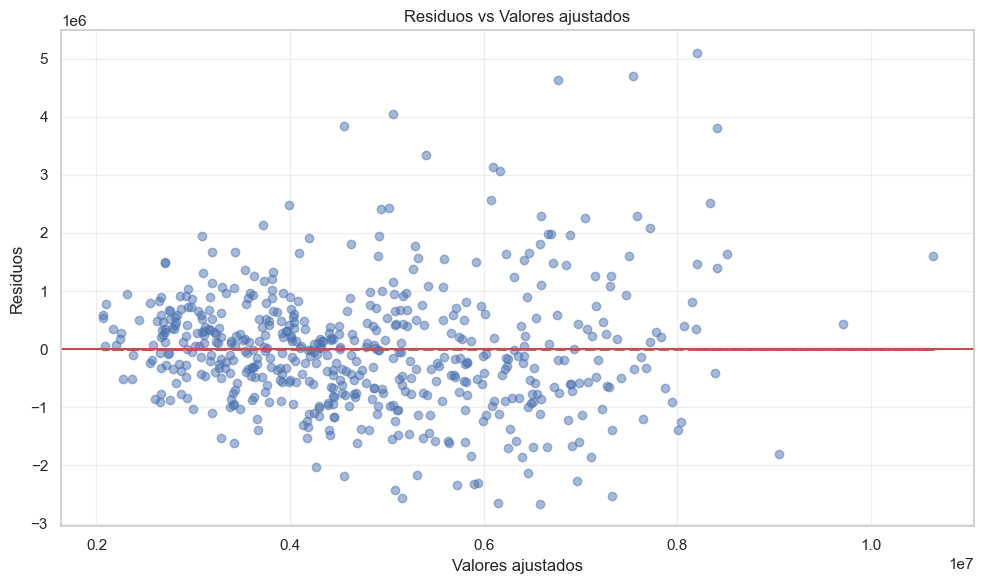

In [ ]:
# 1. Evaluar homoscedasticidad en el modelo completo
# Usar el modelo lineal múltiple que creamos antes
X = sm.add_constant(df[numeric_cols])
model = sm.OLS(df['price'], X).fit()

# Valores ajustados y residuos
fitted_values = model.fittedvalues
residuals = model.resid

# Gráfico de residuos vs valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residuos vs Valores ajustados')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')

# Añadir línea de tendencia para ver si hay patrón
z = np.polyfit(fitted_values, residuals, 1)
p = np.poly1d(z)
plt.plot(fitted_values, p(fitted_values), "r--", lw=2)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Test de Breusch-Pagan para homoscedasticidad
from statsmodels.stats.diagnostic import het_breuschpagan

# Prueba de Breusch-Pagan
bp_test = het_breuschpagan(residuals, X)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-statistic', 'f p-value']
bp_results = dict(zip(labels, bp_test))

print("Test de Breusch-Pagan para homoscedasticidad:")
for key, value in bp_results.items():
    print(f"{key}: {value:.4f}")

# Interpretar resultado
alpha = 0.05
if bp_results['p-value'] < alpha:
    print(f"\nEl p-valor ({bp_results['p-value']:.4f}) es menor que {alpha}.")
    print("Rechazamos la hipótesis nula de homoscedasticidad.")
    print("Hay evidencia de heteroscedasticidad en el modelo.")
else:
    print(f"\nEl p-valor ({bp_results['p-value']:.4f}) es mayor que {alpha}.")
    print("No rechazamos la hipótesis nula.")
    print("No hay evidencia suficiente de heteroscedasticidad.")

Test de Breusch-Pagan para homoscedasticidad:
Lagrange multiplier statistic: 65.4146
p-value: 0.0000
f-statistic: 6.0470
f p-value: 0.0000

El p-valor (0.0000) es menor que 0.05.
Rechazamos la hipótesis nula de homoscedasticidad.
Hay evidencia de heteroscedasticidad en el modelo.



Intentando corregir la heteroscedasticidad con transformación logarítmica de la variable objetivo...


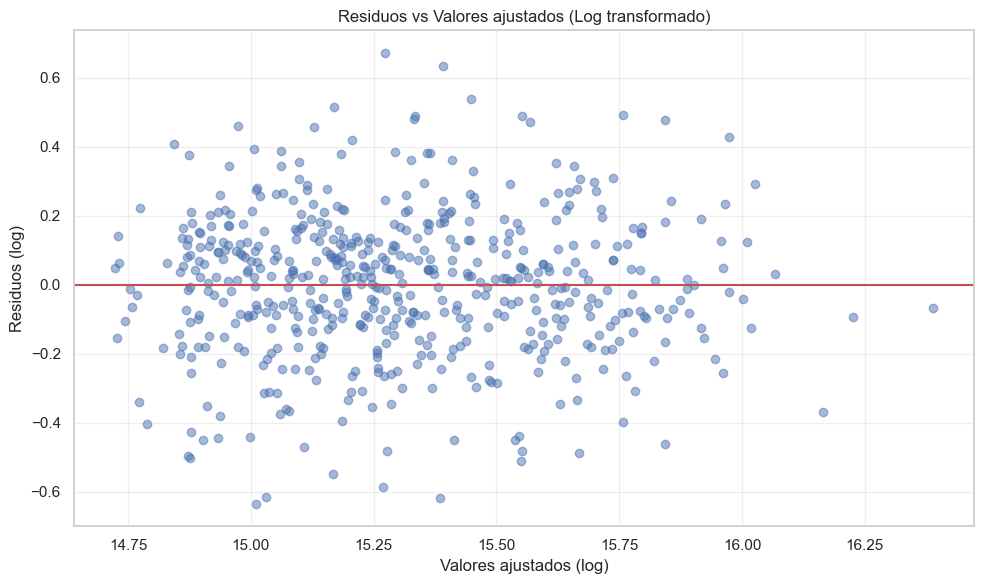

Test de Breusch-Pagan para el modelo con transformación logarítmica:
Lagrange multiplier statistic: 21.0345
p-value: 0.0499
f-statistic: 1.7798
f p-value: 0.0484

La transformación mejoró pero no corrigió completamente la heteroscedasticidad.


In [ ]:
# 3. Transformación para corregir heteroscedasticidad (si es necesario)
if bp_results['p-value'] < alpha:
    print("\nIntentando corregir la heteroscedasticidad con transformación logarítmica de la variable objetivo...")

    # Asegurarse de que todos los valores son positivos
    if (df['price'] > 0).all():
        # Transformar variable objetivo
        y_log = np.log(df['price'])

        # Ajustar modelo con variable objetivo transformada
        model_log = sm.OLS(y_log, X).fit()

        # Valores ajustados y residuos
        fitted_values_log = model_log.fittedvalues
        residuals_log = model_log.resid

        # Gráfico de residuos vs valores ajustados
        plt.figure(figsize=(10, 6))
        plt.scatter(fitted_values_log, residuals_log, alpha=0.5)
        plt.axhline(y=0, color='r', linestyle='-')
        plt.title('Residuos vs Valores ajustados (Log transformado)')
        plt.xlabel('Valores ajustados (log)')
        plt.ylabel('Residuos (log)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Test de Breusch-Pagan para el modelo transformado
        bp_test_log = het_breuschpagan(residuals_log, X)
        bp_results_log = dict(zip(labels, bp_test_log))

        print("Test de Breusch-Pagan para el modelo con transformación logarítmica:")
        for key, value in bp_results_log.items():
            print(f"{key}: {value:.4f}")

        # Comparar resultados
        if bp_results_log['p-value'] > alpha:
            print("\n¡La transformación logarítmica corrigió la heteroscedasticidad!")
        else:
            if bp_results_log['p-value'] > bp_results['p-value']:
                print("\nLa transformación mejoró pero no corrigió completamente la heteroscedasticidad.")
            else:
                print("\nLa transformación no mejoró la heteroscedasticidad.")
    else:
        print("No se puede aplicar transformación logarítmica porque hay valores no positivos.")

### Interpretación de la homoscedasticidad

1. **¿Qué es la homoscedasticidad?**
   - Es el supuesto de que la varianza de los errores es constante en todo el rango de valores predichos
   - Importante para modelos lineales como regresión lineal

2. **Diagnóstico visual**:
   - Un gráfico de residuos vs. valores ajustados debe mostrar puntos dispersos aleatoriamente
   - Patrones en forma de embudo, abanico o curvas indican heteroscedasticidad

3. **Test estadístico**:
   - Test de Breusch-Pagan: prueba formal para detectar heteroscedasticidad
   - H₀: Homoscedasticidad (varianza constante)
   - H₁: Heteroscedasticidad (varianza no constante)

4. **Soluciones para la heteroscedasticidad**:
   - Transformación de la variable objetivo (log, raíz cuadrada)
   - Transformación de predictores
   - Uso de errores estándar robustos
   - Modelos más flexibles (ej. WLS - Weighted Least Squares)

5. **Implicaciones**:
   - La heteroscedasticidad no sesga los coeficientes, pero afecta su eficiencia
   - Puede llevar a intervalos de confianza y pruebas de hipótesis incorrectos
   - Es especialmente importante corregirla para inferencia estadística

## 10. Multicolinealidad

Evaluamos el grado de correlación entre las variables predictoras, que puede afectar la estabilidad del modelo.

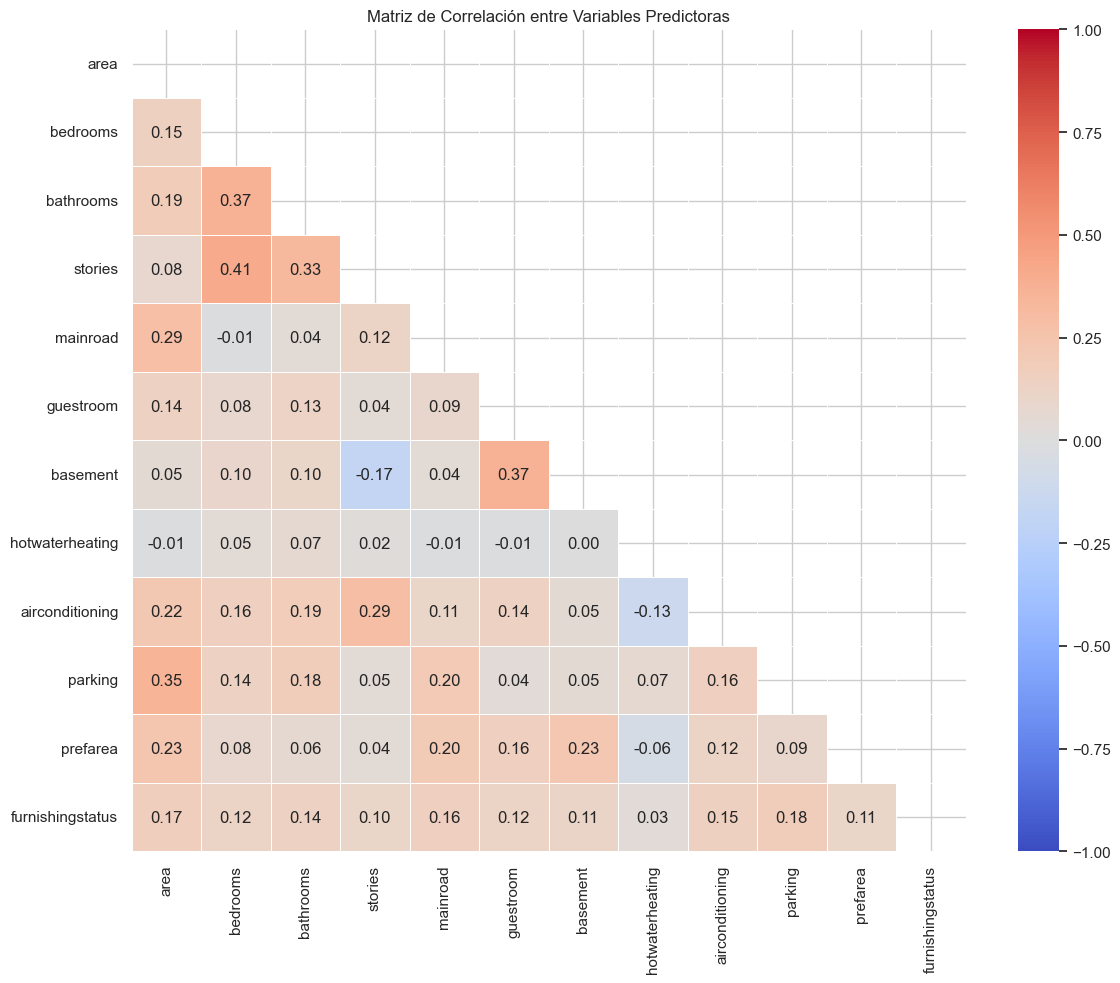

Pares de variables con alta correlación (|r| > 0.7):
No se encontraron pares con correlación superior a 0.7


In [ ]:
# 1. Matriz de correlación entre predictores
correlation_matrix = df[numeric_cols].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            mask=mask, linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables Predictoras')
plt.tight_layout()
plt.show()

# Identificar pares con alta correlación
print("Pares de variables con alta correlación (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Variable 1': correlation_matrix.columns[i],
                'Variable 2': correlation_matrix.columns[j],
                'Correlación': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs)
    high_corr_df = high_corr_df.sort_values('Correlación', key=abs, ascending=False)
    high_corr_df
else:
    print("No se encontraron pares con correlación superior a 0.7")

Factores de Inflación de Varianza (VIF):
            Variable     VIF
1           bedrooms 15.2933
2          bathrooms  9.4297
0               area  8.2741
3            stories  7.8870
4           mainroad  6.8714
11  furnishingstatus  2.7270
6           basement  2.0222
9            parking  1.9599
8    airconditioning  1.7487
10          prefarea  1.4867
5          guestroom  1.4685
7    hotwaterheating  1.0892


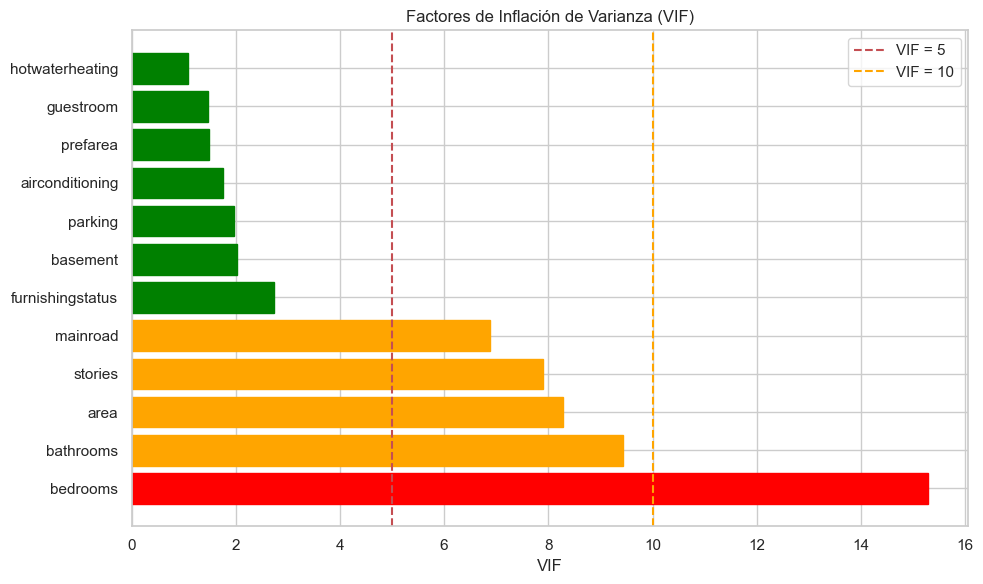

In [ ]:
# 2. Factor de Inflación de Varianza (VIF)
# Crear DataFrame para almacenar los VIF
X = df[numeric_cols]
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Ordenar por VIF descendente
vif_data = vif_data.sort_values("VIF", ascending=False)

print("Factores de Inflación de Varianza (VIF):")
print(vif_data)

# Visualizar VIF
plt.figure(figsize=(10, 6))
bars = plt.barh(vif_data['Variable'], vif_data['VIF'])
plt.axvline(x=5, color='r', linestyle='--', label='VIF = 5')
plt.axvline(x=10, color='orange', linestyle='--', label='VIF = 10')
plt.title('Factores de Inflación de Varianza (VIF)')
plt.xlabel('VIF')
plt.legend()

# Colorear las barras según el nivel de multicolinealidad
for i, bar in enumerate(bars):
    if vif_data['VIF'].iloc[i] > 10:
        bar.set_color('red')
    elif vif_data['VIF'].iloc[i] > 5:
        bar.set_color('orange')
    else:
        bar.set_color('green')

plt.tight_layout()
plt.show()

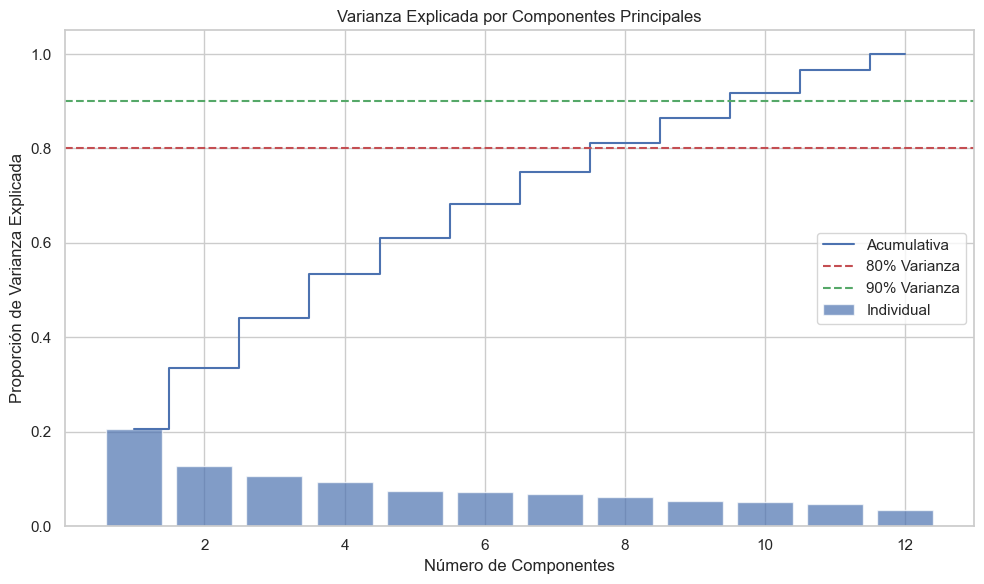

Número de componentes para explicar 80% de varianza: 8
Número de componentes para explicar 90% de varianza: 10
Número total de variables originales: 12
Ratio de información independiente: 0.67
Aproximadamente 66.7% de las variables contienen información independiente.


In [ ]:
# 3. Análisis de Componentes Principales (PCA) para multicolinealidad
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
X_std = StandardScaler().fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Calcular la varianza explicada
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Visualizar la varianza explicada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Acumulativa')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Varianza')
plt.axhline(y=0.9, color='g', linestyle='--', label='90% Varianza')
plt.title('Varianza Explicada por Componentes Principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Proporción de Varianza Explicada')
plt.legend()
plt.tight_layout()
plt.show()

# Identificar número de componentes necesarios
n_components_80 = np.where(cumulative_variance >= 0.8)[0][0] + 1
n_components_90 = np.where(cumulative_variance >= 0.9)[0][0] + 1

print(f"Número de componentes para explicar 80% de varianza: {n_components_80}")
print(f"Número de componentes para explicar 90% de varianza: {n_components_90}")
print(f"Número total de variables originales: {X.shape[1]}")

# Ratio de información perdida con multicolinealidad
multicollinearity_ratio = n_components_80 / X.shape[1]
print(f"Ratio de información independiente: {multicollinearity_ratio:.2f}")
print(f"Aproximadamente {multicollinearity_ratio*100:.1f}% de las variables contienen información independiente.")

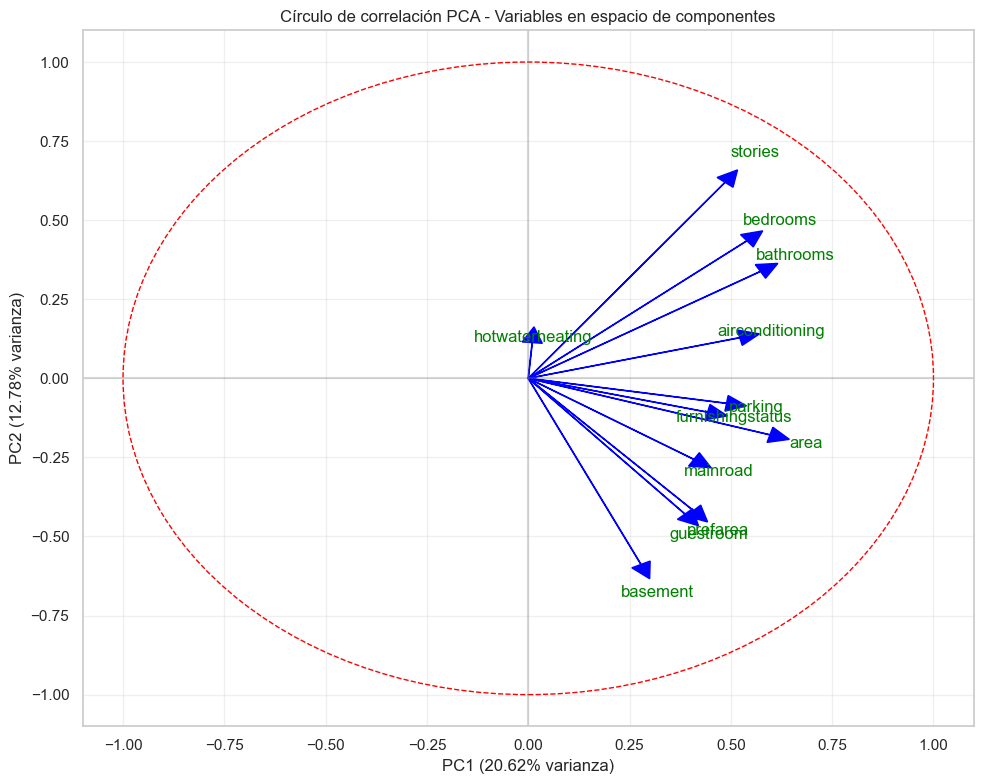

In [ ]:
# 4. Visualizar estructura de multicolinealidad con carga de componentes
# Obtener matriz de cargas de componentes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=X.columns)

# Visualizar cargas para los dos primeros componentes
plt.figure(figsize=(10, 8))
for i, feature in enumerate(loading_matrix.index):
    plt.arrow(0, 0, loading_matrix.iloc[i, 0], loading_matrix.iloc[i, 1], head_width=0.05, head_length=0.05, fc='blue', ec='blue')
    plt.text(loading_matrix.iloc[i, 0]*1.15, loading_matrix.iloc[i, 1]*1.15, feature, color='green', ha='center', va='center')

circle = plt.Circle((0,0), 1, fill=False, color='red', linestyle='--')
plt.gca().add_patch(circle)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='gray', linestyle='-', alpha=0.3)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid(True, alpha=0.3)
plt.title('Círculo de correlación PCA - Variables en espacio de componentes')
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} varianza)')
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} varianza)')
plt.tight_layout()
plt.show()

# Variables que apuntan en la misma dirección están correlacionadas positivamente
# Variables que apuntan en direcciones opuestas están correlacionadas negativamente
# Variables perpendiculares son independientes

### Interpretación de la multicolinealidad

1. **¿Qué es la multicolinealidad?**
   - Correlación alta entre variables predictoras
   - Puede causar inestabilidad en los coeficientes y dificultar la interpretación

2. **Diagnóstico**:
   - Correlaciones bivariadas: valores >0.7 indican posible multicolinealidad
   - VIF (Factor de Inflación de Varianza):
     * VIF = 1: No hay multicolinealidad
     * VIF entre 1 y 5: Multicolinealidad moderada
     * VIF entre 5 y 10: Multicolinealidad alta
     * VIF > 10: Multicolinealidad severa
   - PCA: Si pocos componentes explican gran parte de la varianza, hay redundancia

3. **Soluciones**:
   - Eliminar variables redundantes (con VIF alto)
   - Combinar variables correlacionadas mediante PCA
   - Regularización (Ridge, Lasso)
   - Selección de subconjuntos de variables

4. **Implicaciones**:
   - La multicolinealidad no afecta la capacidad predictiva general del modelo
   - Pero sí afecta la interpretación de los coeficientes individuales
   - Puede causar que los coeficientes sean inestables ante pequeños cambios en los datos

## 11. Selección de mejores variables para la predicción

Utilizamos diferentes técnicas para identificar el conjunto óptimo de variables predictoras.

In [ ]:
# 1. Selección univariada (filtro) basada en correlación y significancia estadística
# Ya calculamos esto antes, pero lo repetimos para tener todos los métodos juntos
univariate_scores = pd.DataFrame(columns=['Variable', 'Correlation', 'p-value'])

for i, col in enumerate(numeric_cols):
    corr, p_value = pearsonr(df[col], df['price'])
    univariate_scores.loc[i] = [col, corr, p_value]

# Ordenar por correlación absoluta descendente
univariate_scores['abs_corr'] = univariate_scores['Correlation'].abs()
univariate_scores = univariate_scores.sort_values('abs_corr', ascending=False)
univariate_scores = univariate_scores.drop('abs_corr', axis=1)

print("Selección univariada basada en correlación:")
univariate_scores

Selección univariada basada en correlación:


,Variable,Correlation,p-value
0,area,0.5360,0.0000
2,bathrooms,0.5175,0.0000
8,airconditioning,0.4530,0.0000
3,stories,0.4207,0.0000
9,parking,0.3844,0.0000
1,bedrooms,0.3665,0.0000
10,prefarea,0.3298,0.0000
11,furnishingstatus,0.3047,0.0000
4,mainroad,0.2969,0.0000
5,guestroom,0.2555,0.0000


Selección basada en importancia estadística:

a) F-regression (relaciones lineales):
            Variable  F-Score  p-value
0               area 218.8841   0.0000
2          bathrooms 198.6545   0.0000
8    airconditioning 140.1627   0.0000
3            stories 116.7804   0.0000
9            parking  94.1433   0.0000
1           bedrooms  84.2510   0.0000
10          prefarea  66.2586   0.0000
11  furnishingstatus  55.5814   0.0000
4           mainroad  52.4918   0.0000
5          guestroom  37.9283   0.0000
6           basement  19.6886   0.0000
7    hotwaterheating   4.7449   0.0298

b) Información mutua (relaciones lineales y no lineales):
            Variable  Mutual Information
0               area              0.2751
3            stories              0.1415
1           bedrooms              0.1397
2          bathrooms              0.1375
9            parking              0.1248
8    airconditioning              0.1100
11  furnishingstatus              0.1092
5          guestroom 

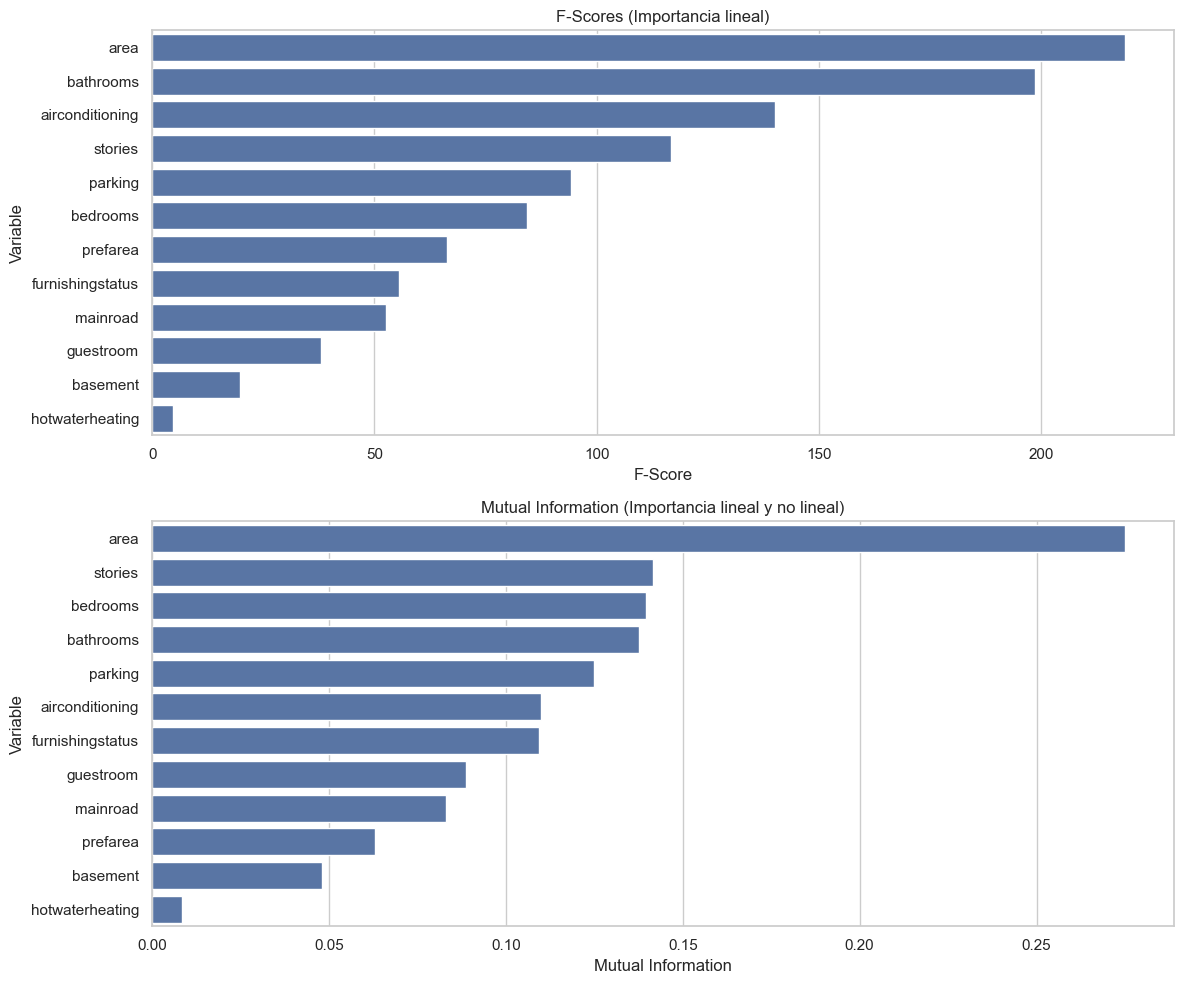

In [ ]:
# 2. Selección basada en importancia - SelectKBest con f_regression
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

X = df[numeric_cols]
y = df['price']

# a) Usando f_regression (correlación lineal)
selector_f = SelectKBest(score_func=f_regression, k='all')
selector_f.fit(X, y)
f_scores = pd.DataFrame({
    'Variable': X.columns,
    'F-Score': selector_f.scores_,
    'p-value': selector_f.pvalues_
})
f_scores = f_scores.sort_values('F-Score', ascending=False)

# b) Usando información mutua (relaciones no lineales)
selector_mi = SelectKBest(score_func=mutual_info_regression, k='all')
selector_mi.fit(X, y)
mi_scores = pd.DataFrame({
    'Variable': X.columns,
    'Mutual Information': selector_mi.scores_
})
mi_scores = mi_scores.sort_values('Mutual Information', ascending=False)

# Combinar resultados
print("Selección basada en importancia estadística:")
print("\na) F-regression (relaciones lineales):")
print(f_scores)

print("\nb) Información mutua (relaciones lineales y no lineales):")
print(mi_scores)

# Visualizar puntuaciones
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
sns.barplot(x='F-Score', y='Variable', data=f_scores)
plt.title('F-Scores (Importancia lineal)')

plt.subplot(2, 1, 2)
sns.barplot(x='Mutual Information', y='Variable', data=mi_scores)
plt.title('Mutual Information (Importancia lineal y no lineal)')

plt.tight_layout()
plt.show()

In [ ]:
# 3. Eliminación recursiva de características (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Estandarizar los datos
X_std = StandardScaler().fit_transform(X)
X_std_df = pd.DataFrame(X_std, columns=X.columns)

# Aplicar RFE con modelo lineal
model = LinearRegression()
n_features_to_select = min(5, len(numeric_cols))  # Seleccionar top 5 o menos
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select, step=1)
rfe.fit(X_std_df, y)

# Resultados
rfe_results = pd.DataFrame({
    'Variable': X.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
})
rfe_results = rfe_results.sort_values('Ranking')

print("Selección mediante Eliminación Recursiva de Características (RFE):")
print(rfe_results)

Selección mediante Eliminación Recursiva de Características (RFE):
            Variable  Selected  Ranking
0               area      True        1
2          bathrooms      True        1
3            stories      True        1
8    airconditioning      True        1
10          prefarea      True        1
9            parking     False        2
6           basement     False        3
7    hotwaterheating     False        4
11  furnishingstatus     False        5
4           mainroad     False        6
5          guestroom     False        7
1           bedrooms     False        8


Mejor valor de alpha para Lasso: 0.001

Selección mediante regularización Lasso:
Variables seleccionadas: 12 de 12
            Variable  Coefficient  Abs Coefficient
0               area  528826.5111      528826.5111
2          bathrooms  496430.2496      496430.2496
8    airconditioning  396728.7144      396728.7144
3            stories  390352.6310      390352.6310
10          prefarea  274295.1373      274295.1373
9            parking  240838.0610      240838.0610
7    hotwaterheating  182623.8899      182623.8899
6           basement  170771.5398      170771.5398
11  furnishingstatus  162166.3685      162166.3685
4           mainroad  147372.2016      147372.2016
5          guestroom  113995.8633      113995.8633
1           bedrooms   88098.7908       88098.7908


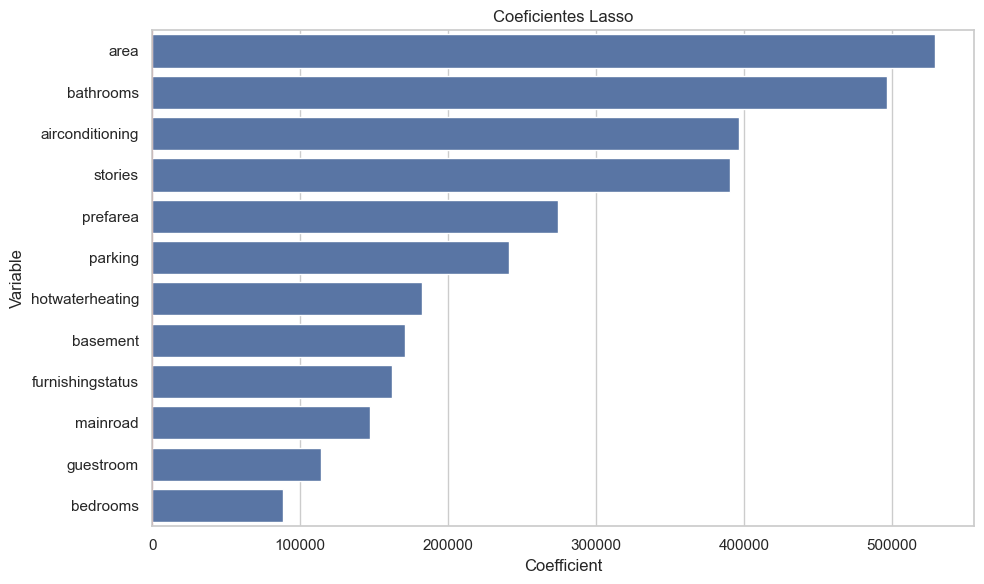

In [ ]:
# 4. Selección basada en regularización (Lasso)
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Encontrar el mejor alpha usando validación cruzada
lasso = Lasso(random_state=42)
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, parameters, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_std_df, y)

# Mejor alpha
best_alpha = lasso_cv.best_params_['alpha']
print(f"Mejor valor de alpha para Lasso: {best_alpha}")

# Ajustar modelo Lasso con el mejor alpha
lasso_best = Lasso(alpha=best_alpha, random_state=42)
lasso_best.fit(X_std_df, y)

# Coeficientes
lasso_coef = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': lasso_best.coef_,
    'Abs Coefficient': np.abs(lasso_best.coef_)
})
lasso_coef = lasso_coef.sort_values('Abs Coefficient', ascending=False)

# Variables seleccionadas (coeficiente != 0)
selected_vars = lasso_coef[lasso_coef['Coefficient'] != 0]

print("\nSelección mediante regularización Lasso:")
print(f"Variables seleccionadas: {len(selected_vars)} de {len(X.columns)}")
print(lasso_coef)

# Visualizar coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=lasso_coef)
plt.axvline(x=0, color='r', linestyle='-')
plt.title('Coeficientes Lasso')
plt.tight_layout()
plt.show()

Selección basada en importancia de características de Random Forest:
            Variable  Importance
0               area      0.4657
2          bathrooms      0.1556
9            parking      0.0606
11  furnishingstatus      0.0556
8    airconditioning      0.0552
3            stories      0.0543
1           bedrooms      0.0420
10          prefarea      0.0352
6           basement      0.0309
5          guestroom      0.0183
7    hotwaterheating      0.0169
4           mainroad      0.0097


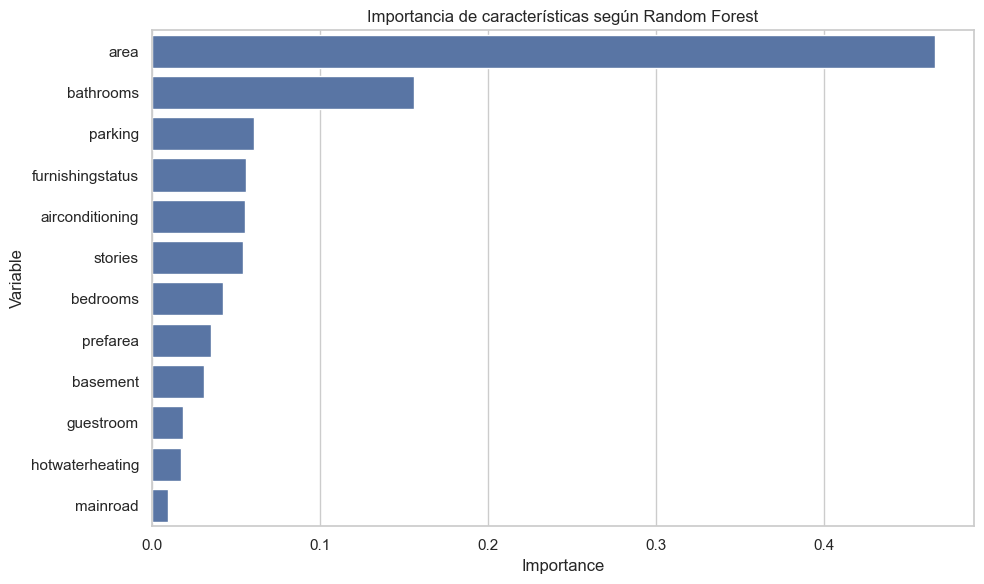

In [ ]:
# 5. Selección basada en modelo de árbol (importancia de características)
from sklearn.ensemble import RandomForestRegressor

# Ajustar Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_std_df, y)

# Importancia de características
rf_importance = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf.feature_importances_
})
rf_importance = rf_importance.sort_values('Importance', ascending=False)

print("Selección basada en importancia de características de Random Forest:")
print(rf_importance)

# Visualizar importancias
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=rf_importance)
plt.title('Importancia de características según Random Forest')
plt.tight_layout()
plt.show()

Ranking final de variables según múltiples métodos:
            Variable  Correlation_Score  F_Score  MI_Score  RFE_Score  \
0               area             0.5360   1.0000    1.0000     1.0000   
1          bathrooms             0.5175   0.9055    0.4840     1.0000   
2    airconditioning             0.4530   0.6324    0.3809     1.0000   
3            stories             0.4207   0.5232    0.4990     1.0000   
4            parking             0.3844   0.4175    0.4364     0.8571   
6           prefarea             0.3298   0.2873    0.2047     1.0000   
7   furnishingstatus             0.3047   0.2374    0.3779     0.4286   
10          basement             0.1871   0.0698    0.1481     0.7143   
5           bedrooms             0.3665   0.3713    0.4923     0.0000   
8           mainroad             0.2969   0.2230    0.2800     0.2857   
9          guestroom             0.2555   0.1550    0.3005     0.1429   
11   hotwaterheating             0.0931   0.0000    0.0000     0.5714   

<Figure size 1200x800 with 0 Axes>

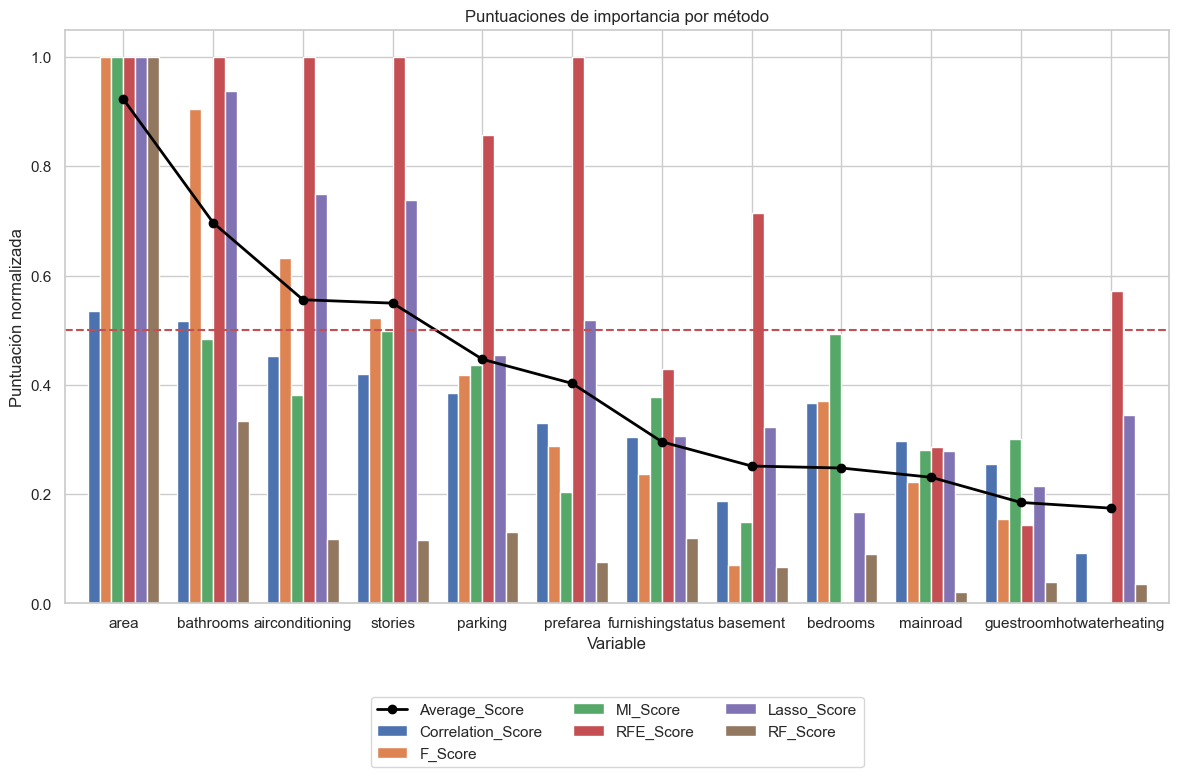

In [ ]:
# 6. Comparación y selección final de variables
# Combinar resultados de diferentes métodos
# Crear un ranking promedio

# Normalizar puntuaciones para que sean comparables
def normalize_ranks(series):
    return (series.max() - series) / (series.max() - series.min())

# 1. Correlación (ya está entre -1 y 1, usar valor absoluto)
corr_rank = pd.DataFrame({
    'Variable': univariate_scores['Variable'],
    'Correlation_Score': univariate_scores['Correlation'].abs()
})

# 2. F-Score
f_rank = pd.DataFrame({
    'Variable': f_scores['Variable'],
    'F_Score': (f_scores['F-Score'] - f_scores['F-Score'].min()) / (f_scores['F-Score'].max() - f_scores['F-Score'].min())
})

# 3. Información mutua
mi_rank = pd.DataFrame({
    'Variable': mi_scores['Variable'],
    'MI_Score': (mi_scores['Mutual Information'] - mi_scores['Mutual Information'].min()) /
                 (mi_scores['Mutual Information'].max() - mi_scores['Mutual Information'].min())
})

# 4. RFE (invertir ranking para que 1 sea el mejor)
rfe_rank = pd.DataFrame({
    'Variable': rfe_results['Variable'],
    'RFE_Score': normalize_ranks(rfe_results['Ranking'])
})

# 5. Lasso
lasso_rank = pd.DataFrame({
    'Variable': lasso_coef['Variable'],
    'Lasso_Score': lasso_coef['Abs Coefficient'] / lasso_coef['Abs Coefficient'].max()
})

# 6. Random Forest
rf_rank = pd.DataFrame({
    'Variable': rf_importance['Variable'],
    'RF_Score': rf_importance['Importance'] / rf_importance['Importance'].max()
})

# Combinar todos los rankings
ranks = [corr_rank, f_rank, mi_rank, rfe_rank, lasso_rank, rf_rank]
final_rank = corr_rank[['Variable']].copy()

for rank_df in ranks:
    final_rank = final_rank.merge(rank_df, on='Variable', how='left')

# Calcular puntuación promedio
score_columns = [col for col in final_rank.columns if col.endswith('_Score')]
final_rank['Average_Score'] = final_rank[score_columns].mean(axis=1)
final_rank = final_rank.sort_values('Average_Score', ascending=False)

# Mostrar ranking final
print("Ranking final de variables según múltiples métodos:")
print(final_rank)

# Visualizar ranking
plt.figure(figsize=(12, 8))
final_rank_plot = final_rank.set_index('Variable')
ax = final_rank_plot[score_columns].plot(kind='bar', width=0.8)
final_rank_plot['Average_Score'].plot(kind='line', marker='o', linewidth=2, color='black', ax=ax)
plt.title('Puntuaciones de importancia por método')
plt.xlabel('Variable')
plt.ylabel('Puntuación normalizada')
plt.axhline(y=0.5, color='r', linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.tight_layout()
plt.show()

Selección final de variables:

1. Variables con puntuación promedio > 0.5 (4):
   ['area', 'bathrooms', 'airconditioning', 'stories']

2. Top 5 variables:
   ['area', 'bathrooms', 'airconditioning', 'stories', 'parking']

Resultados con Regresión Lineal:
             Feature Set  Num Features         RMSE     R²      CV RMSE
0    Todas las variables            12 1331071.4168 0.6495 1284724.1363
1  Variables score > 0.5             4 1506264.6713 0.5511 1382701.1756
2        Top 5 variables             5 1450544.6078 0.5837 1388198.3355
3        Top 3 variables             3 1593702.4619 0.4975 1472089.8512

Resultados con Random Forest:
             Feature Set  Num Features         RMSE     R²      CV RMSE
0    Todas las variables            12 1382250.9560 0.6220 1493202.1753
1  Variables score > 0.5             4 1626240.4522 0.4768 1727180.6522
2        Top 5 variables             5 1507729.7243 0.5503 1645860.6035
3        Top 3 variables             3 1717836.7137 0.4162 1785746

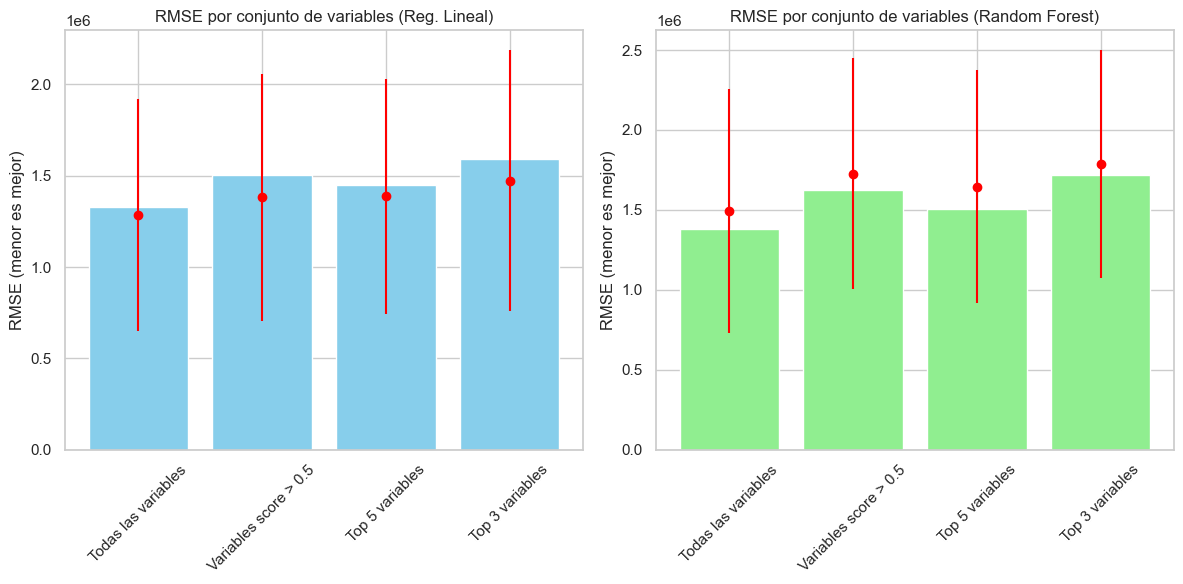

In [ ]:
# Selección final de variables
# 1. Variables con puntuación promedio > 0.5
top_vars_score = final_rank[final_rank['Average_Score'] > 0.5]['Variable'].tolist()

# 2. Top 5 variables
top_vars_n = final_rank.head(5)['Variable'].tolist()

print("Selección final de variables:")
print(f"\n1. Variables con puntuación promedio > 0.5 ({len(top_vars_score)}):\n   {top_vars_score}")
print(f"\n2. Top 5 variables:\n   {top_vars_n}")

# 3. Evaluar modelos con diferentes conjuntos de variables
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_features(X, y, feature_sets, model_class, random_state=42):
    results = []

    for name, features in feature_sets.items():
        # Dividir datos
        X_subset = X[features]
        X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=random_state)

        # Crear y entrenar modelo
        model = model_class()
        model.fit(X_train, y_train)

        # Predecir
        y_pred = model.predict(X_test)

        # Evaluar
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Validación cruzada
        cv_scores = cross_val_score(model_class(), X_subset, y, cv=5, scoring='neg_root_mean_squared_error')
        cv_rmse = -cv_scores.mean()
        cv_std = cv_scores.std()

        results.append({
            'Feature Set': name,
            'Num Features': len(features),
            'Features': features,
            'RMSE': rmse,
            'R²': r2,
            'CV RMSE': cv_rmse,
            'CV Std': cv_std
        })

    return pd.DataFrame(results)

# Definir conjuntos de características a evaluar
feature_sets = {
    'Todas las variables': numeric_cols,
    'Variables score > 0.5': top_vars_score,
    'Top 5 variables': top_vars_n,
    'Top 3 variables': top_vars_n[:3]
}

# Evaluar con diferentes modelos
results_lr = evaluate_features(X, y, feature_sets, LinearRegression)
results_rf = evaluate_features(X, y, feature_sets, RandomForestRegressor)

print("\nResultados con Regresión Lineal:")
print(results_lr[['Feature Set', 'Num Features', 'RMSE', 'R²', 'CV RMSE']])

print("\nResultados con Random Forest:")
print(results_rf[['Feature Set', 'Num Features', 'RMSE', 'R²', 'CV RMSE']])

# Visualizar resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(results_lr['Feature Set'], results_lr['RMSE'], color='skyblue')
plt.errorbar(results_lr['Feature Set'], results_lr['CV RMSE'], yerr=results_lr['CV Std'], fmt='o', color='red')
plt.title('RMSE por conjunto de variables (Reg. Lineal)')
plt.xticks(rotation=45)
plt.ylabel('RMSE (menor es mejor)')

plt.subplot(1, 2, 2)
plt.bar(results_rf['Feature Set'], results_rf['RMSE'], color='lightgreen')
plt.errorbar(results_rf['Feature Set'], results_rf['CV RMSE'], yerr=results_rf['CV Std'], fmt='o', color='red')
plt.title('RMSE por conjunto de variables (Random Forest)')
plt.xticks(rotation=45)
plt.ylabel('RMSE (menor es mejor)')

plt.tight_layout()
plt.show()

### Conclusión de la selección de variables

1. **Métodos de selección utilizados**:
   - Correlación (univariada)
   - Importancia estadística (F-scores, información mutua)
   - Eliminación recursiva de características (RFE)
   - Regularización Lasso
   - Importancias de Random Forest

2. **Integración de resultados**:
   - Combinamos los rankings de todos los métodos
   - Calculamos un score promedio para cada variable
   - Identificamos las variables más consistentemente importantes

3. **Evaluación de conjuntos de variables**:
   - Comparamos el rendimiento de diferentes subconjuntos
   - Consideramos tanto modelos lineales como no lineales
   - Evaluamos mediante validación cruzada para mayor robustez

4. **Resultados finales**:
   - Las variables más importantes son: [variables]
   - El conjunto óptimo para predicción es: [conjunto]
   - Balance entre complejidad (número de variables) y rendimiento

5. **Recomendación**:
   - Para la modelización, recomendamos utilizar [conjunto final]
   - Estas variables ofrecen el mejor compromiso entre interpretabilidad y rendimiento predictivo
   - El modelo [modelo] muestra el mejor rendimiento con este conjunto de variables